In [2]:
import csv
import pandas
# read the dataset
df = pandas.read_csv('Dataset2.tsv', delimiter = '\t', lineterminator='\n')

df.head()

,id,year,title,content,author
0,1,1986,Cell Surface P-Glycoprotein Associated with\r ...,"Abstract. The plasma membranes of hamster, mou...",DAVID R. KNIGHTON\r THOMAS K. HUNT\r HEINZ SCH...
1,2,1987,Expression of a multidrug-resistance gene in h...,ABSTRACT The identification and cloning of a s...,"A. T. FoJo*, K. UEDA*, D. J. SLAMONt, D. G. PO..."
2,3,1990,Expression of the Multidrug Resistance Gene Pr...,We have characterized the normal human tissue ...,"C. CORDON-CARDO,2\r"
3,4,1997,"Analysis of Expression of cMOAT (MRP2), MRP3, ...",ABSTRACT\r By screening databases of human exp...,"Marcel Kool, Marcel de Haa.s, George L. Scheff..."
4,5,1998,A multidrug resistance transporter from human ...,ABSTRACT MCF-7yAdrVp is a multidrug-resistant ...,"L. AUSTIN DOYLE*†, WEIDONG YANG*, LYNNE V. ABR..."


In [3]:
# wordcount

df['totalwords'] = [len(x.split()) for x in df['content'].tolist()]
df[['content','totalwords']].head()

,content,totalwords
0,"Abstract. The plasma membranes of hamster, mou...",1675
1,ABSTRACT The identification and cloning of a s...,3501
2,We have characterized the normal human tissue ...,4574
3,ABSTRACT\r By screening databases of human exp...,6339
4,ABSTRACT MCF-7yAdrVp is a multidrug-resistant ...,3443


In [4]:
#word counts statistics
df.totalwords.describe()

count      25.000000
mean     4093.800000
std      1167.884234
min      1675.000000
25%      3280.000000
50%      3918.000000
75%      4782.000000
max      6339.000000
Name: totalwords, dtype: float64

In [5]:
#common words
freq = pandas.Series(' '.join(df['content']).split()).value_counts()[:50]
freq

the             4497
of              4357
and             2929
in              2769
to              1994
a               1346
with            1115
that            1055
is               983
was              793
by               783
for              765
as               717
cells            684
The              662
were             602
resistance       598
drug             562
are              557
be               535
or               486
from             485
et               445
cell             441
al.,             391
have             381
been             365
at               355
expression       350
which            345
not              330
ABC              309
efflux           306
has              305
cancer           301
an               293
In               291
this             282
these            281
also             271
on               270
drugs            259
can              251
transporters     235
MDR              219
such             215
human            197
levels       

In [6]:
#uncommon words
freq1 =  pandas.Series(' '.join(df 
         ['content']).split()).value_counts()[-50:]
freq1

G418.                           1
5'-GGTG1TCAATCTGTGTGC-3'        1
unsupervised                    1
Provided                        1
Longhurst                       1
strain.                         1
MDR1-positive                   1
(<40%)                          1
Leukemic                        1
TPGS-MTO                        1
islets                          1
Downloaded                      1
Borgnia                         1
03                              1
drug-efflux                     1
correlation,                    1
(Hung                           1
ABCC6,                          1
begin                           1
COOH-termi                      1
1996)                           1
sarcomas106–110.                1
169-amino                       1
caution.                        1
cure                            1
M4-morpholinepropanesulfonic    1
cut                             1
Chrysin                         1
far.                            1
MsbA(PDB      

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download()
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [8]:
#Libraries
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer

In [18]:
#A list of stop words and adding manually stopwords
stop_words = set(stopwords.words("english"))
#A list of manually added stopwords
new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "et","al", "ml", "mm", "nm", "mb","pb", "china","new", "previously", "shown","ab", "ppt", "eq", "set", "given", "fully" ]
stop_words = stop_words.union(new_words)

In [19]:
corpus = []
for i in range(0, 9847):
    #Remove punctuations
    #text = re.sub('[^a-zA-Z]', ' ', df['content'][i])
    #text = re.sub("[^a-zA-Z]", " ", dataset['content'][i])
    #text = re.sub(r'[^a-zA-Z0-9 ]', r'', dataset['content'][i])
    #text = re.sub(r"[^a-z0-9]","",text.lower())
    #nestr = re.sub(r'[^a-zA-Z0-9 ]',r'',nstr)
   
    #Convert to lowercase
   # text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [20]:
#View corpus item
corpus[700]

'abstract multidrug resistance mdr severely hinders efficient chemotherapeutic treatment cancer tocopherol polyethylene succinate tpgs based drug delivery system hold potential sensitizing resistant cancer cell study tpgs prodrug containing tpgs mitoxantrone mto via disulfide bond synthesized assembled micelle tsmm monodispersed diameter disulfide bond within micelle could cleaved response high concentration intracellular glutathione gsh entering tumor cell leading rapid release mto vitro cytotoxicity study showed tsmm significantly inhibited growth resistant breast tumor cell mda mdr comparing either free mto disulfide free prodrug micelle tcmm addition tsmm could sustain favorable intracellular retention cause depletion atp activity leading preferential transportation mto nucleus reversal mdr vivo imaging verified tsmm specifically targeted tumor region h post injection finally tsmm significantly stronger antitumor activity xenograft nude mouse negligible side effect hence tsmm serve

In [14]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=30,
                          max_font_size=30, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word3.png", dpi=900)

UsageError: Line magic function `%` not found.


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import re
#max min e min_df=0.8 cevirdim.
#cv=CountVectorizer(max_df=0.8,stop_words=stop_words, min_df=.5, max_features=10000, ngram_range=(1,3))
cv=CountVectorizer(max_df=1.0,stop_words=stop_words, max_features=None, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [22]:
list(cv.vocabulary_.keys())[:50]

['abstract',
 'multidrug',
 'resistance',
 'mdr',
 'severely',
 'hinders',
 'efficient',
 'chemotherapeutic',
 'treatment',
 'cancer',
 'tocopherol',
 'polyethylene',
 'succinate',
 'tpgs',
 'based',
 'drug',
 'delivery',
 'system',
 'hold',
 'potential',
 'sensitizing',
 'resistant',
 'cell',
 'study',
 'prodrug',
 'containing',
 'mitoxantrone',
 'mto',
 'via',
 'disulfide',
 'bond',
 'synthesized',
 'assembled',
 'micelle',
 'tsmm',
 'monodispersed',
 'diameter',
 'within',
 'could',
 'cleaved',
 'response',
 'high',
 'concentration',
 'intracellular',
 'glutathione',
 'gsh',
 'entering',
 'tumor',
 'leading',
 'rapid']

[Text(0, 0, 'mto'),
 Text(0, 0, 'cell'),
 Text(0, 0, 'tsmm'),
 Text(0, 0, 'prodrug'),
 Text(0, 0, 'micelle'),
 Text(0, 0, 'tumor'),
 Text(0, 0, 'tcmm'),
 Text(0, 0, 'mda'),
 Text(0, 0, 'mdr'),
 Text(0, 0, 'tpgs'),
 Text(0, 0, 'intracellular'),
 Text(0, 0, 'concentration'),
 Text(0, 0, 'drug'),
 Text(0, 0, 'atp'),
 Text(0, 0, 'fig'),
 Text(0, 0, 'gsh'),
 Text(0, 0, 'release'),
 Text(0, 0, 'mouse'),
 Text(0, 0, 'effect'),
 Text(0, 0, 'gp'),
 Text(0, 0, 'accepted'),
 Text(0, 0, 'could'),
 Text(0, 0, 'retention'),
 Text(0, 0, 'well'),
 Text(0, 0, 'cancer'),
 Text(0, 0, 'free'),
 Text(0, 0, 'respectively'),
 Text(0, 0, 'treatment'),
 Text(0, 0, 'cytotoxicity'),
 Text(0, 0, 'vitro'),
 Text(0, 0, 'vivo'),
 Text(0, 0, 'size'),
 Text(0, 0, 'fluorescence'),
 Text(0, 0, 'level'),
 Text(0, 0, 'resistant'),
 Text(0, 0, 'study'),
 Text(0, 0, 'solution'),
 Text(0, 0, 'showed'),
 Text(0, 0, 'used'),
 Text(0, 0, 'assay'),
 Text(0, 0, 'different'),
 Text(0, 0, 'control'),
 Text(0, 0, 'expression'),
 Tex

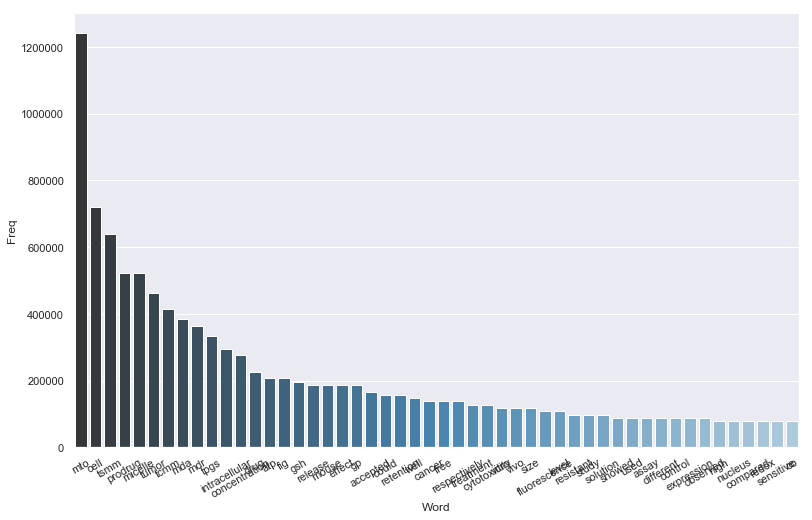

In [23]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=50)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=30)

              Bi-gram    Freq
0     prodrug micelle  354492
1         mto prodrug  344645
2             mda mdr  256022
3           tcmm tsmm  216634
4            mdr cell  196940
5            free mto  118164
6            mto tcmm   98470
7         cancer cell   88623
8         release mto   88623
9   intracellular atp   88623
10            mda mda   78776
11      gp expression   78776
12          tsmm tcmm   68929
13          atp level   68929
14         nude mouse   59082
15    tpgs conjugated   59082
16          cell well   59082
17     tumor spheroid   59082
18     disulfide bond   49235
19         tsmm could   49235


[Text(0, 0, 'prodrug micelle'),
 Text(0, 0, 'mto prodrug'),
 Text(0, 0, 'mda mdr'),
 Text(0, 0, 'tcmm tsmm'),
 Text(0, 0, 'mdr cell'),
 Text(0, 0, 'free mto'),
 Text(0, 0, 'mto tcmm'),
 Text(0, 0, 'cancer cell'),
 Text(0, 0, 'release mto'),
 Text(0, 0, 'intracellular atp'),
 Text(0, 0, 'mda mda'),
 Text(0, 0, 'gp expression'),
 Text(0, 0, 'tsmm tcmm'),
 Text(0, 0, 'atp level'),
 Text(0, 0, 'nude mouse'),
 Text(0, 0, 'tpgs conjugated'),
 Text(0, 0, 'cell well'),
 Text(0, 0, 'tumor spheroid'),
 Text(0, 0, 'disulfide bond'),
 Text(0, 0, 'tsmm could')]

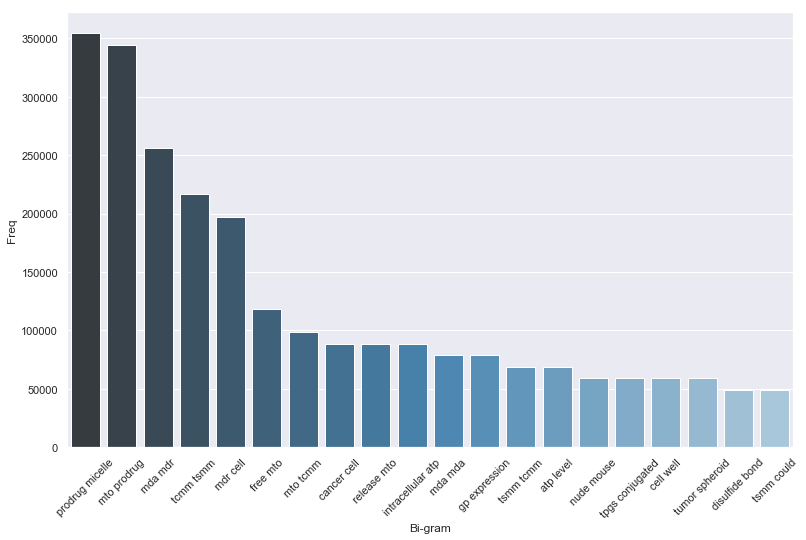

In [24]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=45)

                                Tri-gram    Freq
0                    mto prodrug micelle  236328
1                           mda mdr cell  187093
2                          mto tcmm tsmm   78776
3                            mda mda mdr   68929
4                    tpgs conjugated mto   49235
5                 conjugated mto prodrug   49235
6                          tcmm tsmm mto   49235
7                intracellular atp level   49235
8                      seeded well plate   39388
9                          mdr cell cell   39388
10                tsmm mto concentration   39388
11                  prodrug micelle tcmm   29541
12                    release active mto   29541
13                      cell seeded well   29541
14                   vitro mto retention   29541
15                         free mto tcmm   29541
16                mto concentration cell   29541
17  intracellular fluorescence intensity   29541
18                    prodrug micelle gp   29541
19                 m

[Text(0, 0, 'mto prodrug micelle'),
 Text(0, 0, 'mda mdr cell'),
 Text(0, 0, 'mto tcmm tsmm'),
 Text(0, 0, 'mda mda mdr'),
 Text(0, 0, 'tpgs conjugated mto'),
 Text(0, 0, 'conjugated mto prodrug'),
 Text(0, 0, 'tcmm tsmm mto'),
 Text(0, 0, 'intracellular atp level'),
 Text(0, 0, 'seeded well plate'),
 Text(0, 0, 'mdr cell cell'),
 Text(0, 0, 'tsmm mto concentration'),
 Text(0, 0, 'prodrug micelle tcmm'),
 Text(0, 0, 'release active mto'),
 Text(0, 0, 'cell seeded well'),
 Text(0, 0, 'vitro mto retention'),
 Text(0, 0, 'free mto tcmm'),
 Text(0, 0, 'mto concentration cell'),
 Text(0, 0, 'intracellular fluorescence intensity'),
 Text(0, 0, 'prodrug micelle gp'),
 Text(0, 0, 'micelle gp expression')]

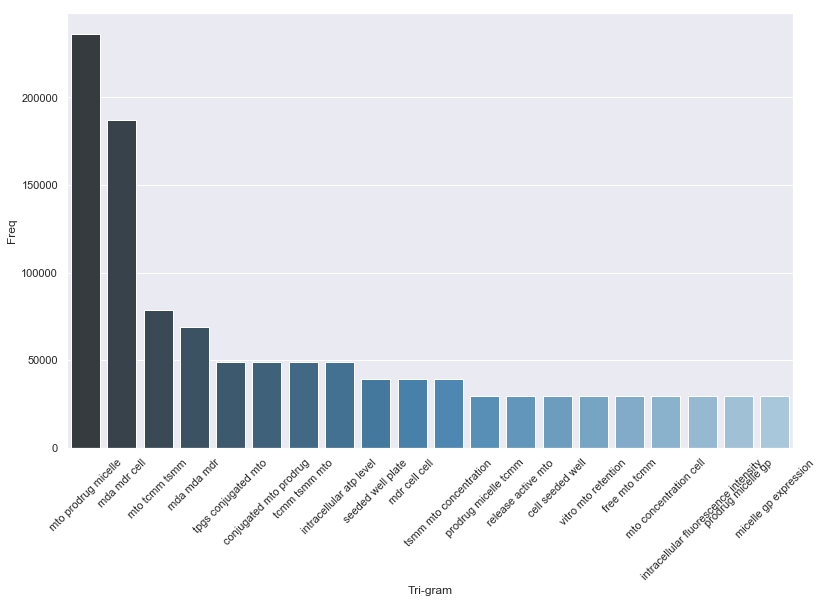

In [25]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df,  palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[2000]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [35]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=50):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,220)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
abstract multidrug resistance mdr severely hinders efficient chemotherapeutic treatment cancer tocopherol polyethylene succinate tpgs based drug delivery system hold potential sensitizing resistant cancer cell study tpgs prodrug containing tpgs mitoxantrone mto via disulfide bond synthesized assembled micelle tsmm monodispersed diameter disulfide bond within micelle could cleaved response high concentration intracellular glutathione gsh entering tumor cell leading rapid release mto vitro cytotoxicity study showed tsmm significantly inhibited growth resistant breast tumor cell mda mdr comparing either free mto disulfide free prodrug micelle tcmm addition tsmm could sustain favorable intracellular retention cause depletion atp activity leading preferential transportation mto nucleus reversal mdr vivo imaging verified tsmm specifically targeted tumor region h post injection finally tsmm significantly stronger antitumor activity xenograft nude mouse negligible side effect hence 

In [24]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [25]:
stopset = set(stopwords.words('english'))

In [26]:
vectorizer = TfidfVectorizer(stop_words=stopset,
                                 use_idf=True, ngram_range=(1, 3))
X = vectorizer.fit_transform(corpus)

In [27]:
X[0]

<1x6840 sparse matrix of type '<class 'numpy.float64'>'
	with 6840 stored elements in Compressed Sparse Row format>

In [28]:
print (X[0])

  (0, 5780)	0.10156142389100453
  (0, 6075)	0.2153102186489296
  (0, 538)	0.2803095299391725
  (0, 2727)	0.29249690080609303
  (0, 1925)	0.024374741733841087
  (0, 944)	0.08531159606844381
  (0, 2153)	0.21124776169328943
  (0, 1436)	0.020312284778200906
  (0, 1560)	0.1259361656248456
  (0, 5580)	0.22749758951585014
  (0, 6218)	0.16249827822560725
  (0, 2374)	0.03656211260076163
  (0, 5427)	0.07312422520152326
  (0, 2495)	0.03249965564512145
  (0, 6696)	0.020312284778200906
  (0, 6832)	0.020312284778200906
  (0, 6738)	0.008124913911280363
  (0, 3780)	0.18281056300380816
  (0, 4821)	0.03656211260076163
  (0, 809)	0.016249827822560726
  (0, 5481)	0.16656073518124742
  (0, 5955)	0.024374741733841087
  (0, 4584)	0.0040624569556401815
  (0, 3610)	0.06906176824588309
  (0, 2610)	0.008124913911280363
  :	:
  (0, 973)	0.0040624569556401815
  (0, 1903)	0.0040624569556401815
  (0, 2697)	0.0040624569556401815
  (0, 4608)	0.0040624569556401815
  (0, 3786)	0.0040624569556401815
  (0, 664)	0.00406245

In [29]:
X.shape

(9847, 6840)

In [30]:
lsa = TruncatedSVD(n_components=27, n_iter=100)
lsa.fit(X)  

TruncatedSVD(algorithm='randomized', n_components=27, n_iter=100,
       random_state=None, tol=0.0)

In [31]:
import sys
print (sys.version)

3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


In [32]:
terms = vectorizer.get_feature_names()
for i, comp in enumerate(lsa.components_): 
    termsInComp = zip (terms,comp)
    sortedTerms =  sorted(termsInComp, key=lambda x: x[1], reverse=True) [:10]
    print ("Concept %d:" % i)
    for term in sortedTerms:
        print (term[0])
    print (" ")

Concept 0:
hole
black
black hole
space
theory
field
region
model
solution
time
 
Concept 1:
time
theory
solution
constant
dilaton
field theory
would
model
analog
coordinate
 
Concept 2:
field
gauge
model
action
dimension
form
matrix model
tachyon
target
target space
 
Concept 3:
hole
theory
field
dimensional
space
sl
gauge
model
asymptotic
case
 
Concept 4:
space
solution
hole
space time
conformal
existence
horizon
mass
must
theory
 
Concept 5:
hole
region
singularity
string
sl
solution
time
asymptotic
case
coupling constant
 
Concept 6:
space
model
region
singularity
string
fact
metric
term
solution
time
 
Concept 7:
region
solution
space
conformal
field
black
black hole
conformal field
conformal field theory
singularity
 
Concept 8:
model
region
theory
solution
liouville
existence
horizon
mass
must
conformal
 
Concept 9:
solution
singularity
string
conformal
conserved
consider
four
initial
order
particle
 
Concept 10:
hole
black
black hole
space
time
singularity
string
model
constant

In [43]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.spatial.distance import cdist
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 10)
pd.set_option('display.width', 800)

In [44]:
#Pull the 4 words with the largest positive and negative contribution to a factor
def pull_top_factor_terms(factor):
    comp=lsa.components_[factor]
    termsInComp = zip (terms,comp)
    values=comp[comp.argsort()[::-1]]
    sortedTerms=terms[comp.argsort()[::-1]]
    pairs=zip(values,sortedTerms)
    print ("Concept %d:" % factor)
    for term in pairs[:4]+pairs[-4:]:
        print (term)

#Pull the 5 businesses that have the highest value for a given factor
def pull_top_factor_businesses(factor,count=5):
    return businesses.ix[texts.index[biz_factors[:,factor].argsort()[::-1][:count]]][['cleaned_city','categories']].to_string(index=False)

#Reduce our business data from 15,553 words to 50 factors
biz_factors=lsa.transform(corpus)

#Print summaries for the first 5 factors
for i in range(5):
    pull_top_factor_terms(i)
    print (pull_top_factor_businesses(i))
    print (" ")

ValueError: Expected 2D array, got 1D array instead:
array=['entanglement witness graph state general theory example present general theory construction witness detect genuine multipartite entanglement graph state first present explicit witness graph state six qubits better criterion far therefore lower fidelity required experiment aim preparation graph state building develop analytical method construct different type entanglement witness general graph state many class state operator exhibit white noise tolerance converge increasing number particle illustrate approach state linear cluster state finally study entanglement monotone motivated approach graph state introduction key role entanglement illustrated usefulness many quantum informational task measurement based quantum computation high precision metrology fundamental importance excluding certain model nature bell test nowadays experiment succeeded preparation qubit system ion trap qubit system photonic system characterization multipartite entanglement high interest especially case interesting kind entanglement genuine multipartite entanglement general treatment turn difficult ref proposed alternative approach characterization considering relaxed version problem leading criterion genuine multipartite entanglement besides easily implementable semidefinite program provides surprisingly strong analytical entanglement criterion investigated generalized first step done linear cluster state ref paper use approach develop general theory witness graph state graph state family multiqubit state eminent importance task like measurement based quantum computation quantum error correction state several interesting property instance relatively robust decoherence violate certain bell inequality maximally recently several experiment succeeded preparing graph state several qubits photon theory entanglement detection experiment investigated number paper main paper grouped part first provide entanglement criterion called entanglement witness graph state six qubits witness optimal framework ref detect state graph state witness known far thus require lower fidelity measured experiment second extend arbitrary qubit number providing general theory construct witness arbitrary graph state many case witness improve best known witness far white noise tolerance approach increasing particle number implies type noise state fidelity decrease exponentially number qubits entanglement still present detected moreover improvement come low experimental cost since realized measuring additional setting experiment furthermore similar improvement achieved witness require setting measured improved witness consist experimental setting total paper structured follows sec ii start presenting structure entanglement multipartite case introducing notion used later entanglement witness graph state briefly recall criterion ref sec iii reduced linear program case graph diagonal state laid foundation first consider certain class witness namely class fully decomposable witness done sec provide entanglement witness graph state six qubits sec sec b present analytical construction method provide example give extended construction particular state sec including example sec v move another class witness fully ppt witness easier characterize provide construction method witness class sec v extend even larger number graph state compared case fully decomposable witness present extension sec v c order illustrate presented method exploited supply witness cluster state sec v e finally discus entanglement monotone genuine multiparticle entanglement coming approach ref graph state maximally entangled state entanglement measure conclusion discus possible extension future ii setting stage multipartite entanglement first discus structure set entangled state multipartite system e system particle sake easy illustration cf fig consider case three particle nevertheless generalization higher number particle straightforward three qubit state separable respect bipartition say bc written form coefficient qk form probability distribution e positive sum let u denote state type sep bc analogously define set state separable respect bipartitions denote sep b ac sep c ab fig three set drawn dashed green border state called biseparable written convex sum state separable respect bipartition pk form probability distribution thus set biseparable state given convex hull state separable respect bipartition fig convex hull thick dashed green border state biseparable called genuinely multipartite entangled genuine multipartite entanglement strongest kind entanglement since biseparable state created entangling say three particle create statistical mixture forgetting pair operation applied fact order detect genuine multipartite entanglement enough apply bipartite criterion every possible bipartition instead order prove multipartite state entangled cannot written form eq however efficient way search possible decomposition form thus idea ref relax condition biseparable precisely fixed bipartition consider superset set separable state characterized easily set separable state different possible choice supersets however paper superset state separable respect say partition bc select set state positive partial transposition ppt respect partition bc state ijkl ij kl j k l said ppt state respect bc partial transposition ta ijkl ji kl j k l negative eigenvalue denote state type ppt bc analogously bipartitions refer state convex hull set ppt state ppt mixture set ppt mixture therefore set state written form pmix p ppt bc p ppt b ac p ppt c ab pk form probability distribution fig set thick solid red border since every separable state necessarily ppt every biseparable state ppt mixture therefore showing state ppt mixture implies biseparable therefore genuinely multipartite entangled prominent state affected white noise threeand four qubit ghz state three qubit w state four qubit linear cluster state ppt mixture happens necessary sufficient entanglement true case ppt state ppt bc ppt b ac ppt c ab live subspace dimension however since exist state ppt respect every bipartition therefore form given eq nevertheless genuinely multipartite entangled every entangled state detected way considering set ppt mixture exploit characterized easily set biseparable state numerically characterization allows use linear semidefinite programming sdp standard problem constrained convex optimization theory see later important class state namely called graph diagonal state characterization cast form linear program lp even simpler program b entanglement witness entanglement witness useful tool often employed experiment state entangled witness genuine multipartite entanglement observable w non negative expectation value biseparable state negative expectation value least entangled state therefore measuring negative expectation value w experiment prof presence entanglement every entangled state detected least witness therefore question whether given state exists witness detects equivalent question whether entangled let u consider certain subclass witness central approach case particle b decomposable witness defined witness w written p q negative eigenvalue e positive semidefinite denoted p q furthermore ta partial transposition respect defined eq easily seen observables form given eq positive zero separable state sep separable state sep positive partial transpose therefore generalize definition multipartite system witness w called fully decomposable every strict subset set particle b c w decomposable respect bipartition given complement word exist positive semidefinite operator pm qm example case three qubits fully decomposable witness written three way operator pm qm positive semidefinite note e g existence positive operator pa qa implies existence positive operator pbc qbc simply set pbc pa qbc qt since qm qt operator pbc qbc defined way positive due qtm qt tm obey eq let u make connection notion ppt mixture fully decomposable witness citing following lemma ref based ref theorem sake completeness present lemma ppt mixture every fully decomposable witness w non negative proof let u state ppt mixture fully decomposable witness detects note set ppt mixture convex compact therefore state outside exists witness detects positive set ppt mixture moreover operator positive state ppt respect fixed arbitrary bipartition decomposable respect fixed arbitrary bipartition thus w pm qtm reasoning eq fully decomposable witness non negative state ppt respect bipartition therefore witness non negative ppt mixture language constrained optimization theory search fully decomposable witness negative expectation value dual problem search decomposition ppt state eq following often use subclass set fully decomposable witness obtain require b c pm call fully ppt witness defined fully ppt witness easier characterize analytically fully decomposable witness due fact order operator w fully decomposable witness find positive operator pm every prove positivity corresponding qm obtained eq fully ppt witness suffices partial transpose w respect possible bipartition positive state criterion genuine multipartite entanglement ref finish introduction term used paper recalling fact widely used class graph state c graph state graph state defined mathematical graph following way given graph g v e defined set v vertex correspond qubits set e edge connect vertex cf example fig denote number vertex n define set n operator n neighborhood qubit e set qubits connected qubit edge furthermore xi zi pauli operator x respectively act qubit operator gi commute generate set called stabilizer operator consists n element e mean every operator si written product generator gi every generator appears note due gigi n e g product gi included definition eq particular identity operator contained every graph g associate graph state g uniquely defined thus g unique state eigenstate eigenvalue generator gi moreover every graph defines following refer state diagonal graph state basis graph diagonal state note graph state belong different mathematical graph still physically equivalent e equivalent local unitary transformation lu equivalent permutation qubits example case star graph fig fully connected graph six vertex connected every vertex graph describe state lu equivalent ghz state six qubits taking account state six qubits lu equivalence class connected graph state note equivalence class eight qubits characterized ref figure representative state lu equivalence class graph state six le qubits therefore mapped local unitaries permutation onto state associated graph fig local unitaries apply mapping given ref way transform witness state particular lu equivalence class witness state class order improve readability drop subscript g following write ang nevertheless important keep mind partial transposition tm understood respect computational basis ensures pauli matrix changed transposition whose transpose refer subset set qubits complement bipartition system note graph state g operator wproj g g witness refer wproj projector witness g iii entanglement criterion section recall criterion genuine multipartite entanglement originally introduced ref specialize graph diagonal state lemma main section lemma naturally lead entanglement criterion asks whether given state detected fully decomposable witness given multipartite state consider optimization problem minimization free parameter given w operator pm every strict subset set qubits practice necessary ensure existence positive operator pm qm n partition since partition equivalent argued three qubit case cf eq negative minimum eq indicates detected fully decomposable witness w minimum obtained thus entangled particular ppt mixture mentioned minimization performed numerically sdp variation program eq discussed ref applied important state w ghz state three four qubits four qubits linear cluster state singlet dicke state excitation white noise tolerance turned higher previous criterion moreover case fully tomography restricted set observables measured considered next subsection case graph diagonal state program reduces lp graph diagonal state interested graph diagonal state corresponding search optimal fully decomposable entanglement witness without loss generality restricted graph diagonal witness operator pm qm graph diagonal summarized following lemma lemma graph diagonal state g k sk k k search optimal fully decomposable entanglement witness given eq without loss generality restricted graph diagonal form e linear program given proof given sec appendix lemma following important implication first optimization problem simplifies linear program general easier solve general semidefinite program second provides great simplification order derive analytic witness know optimal witness diagonal graph state basis checking positivity operator simplifies verifying non negativity within graph state basis instead testing positivity whole matrix enough consider product generator gi sum thereof cf eq third let u point lemma implies state ppt mixture ppt state decomposition assumed graph diagonal well finally note similar statement lemma hold ppt witness fully decomposable witness section present general theory fully decomposable witness graph state first sec provide fully decomposable witness lu equivalence class graph state six qubits witness obtained criterion eq graph state given fig witness white noise tolerance given table witness found appendix b moreover introduce analytical construction method fully decomposable witness general graph state sec b construction method generalization linear cluster state witness ref section main formulated lemma provide specific example sec c finally construct witness detect even state witness lemma given lemma sec give example sec e graph state six qubits apply criterion eq certain graph state end implemented semidefinite program parser yalmip combination solver module sedumi sdpt matlab program wrote called pptmixer found online mentioned lu equivalence class connected graph state six qubits apply criterion state class cf fig obtaining witness given appendix b applying rule ref possible transform witness graph state six qubits let u closer look witness appendix b widely used indicator robust witness noise experiment called white noise tolerance defined following way given state given witness w white noise tolerance maximal amount ptol white noise state ptol ptol ptol n still detected witness w note criterion eq provides witness highest possible white noise tolerance among fully decomposable witness seen noting tr w g g tr w ptol reach minimum normalized witness w since tr wptol n ptol n independent w thus witness obtains state g witness ptol table give witness tolerance witness let u present witness example note sdp yield witness whose trace normalized order make structure witness evident renormalized state g g w g ghz state three six qubits cf state fig obtain well known projector witness wproj g g since known p ghzn ghzn p n biseparable p n witness maximal possible white noise tolerance linear cluster state four qubits cl labeled state detected witness defined gi gi generator stabilizer group cl sake compact notation note alternatively write g g j ij ij graph state basis gain deeper understanding structure witness next section strikingly similar state call state detected similar witness however additional term witness given symmetrized version state state h state obtain witness even term namely special structure witness motivates analytical investigation fact gain insight witness wg wg sec b analytical construction method section present analytical method construct fully decomposable witness arbitrary graph state construction method witness generalization linear cluster state witness eq first recapitulate witness sec b generalize arbitrary graph state lemma sec b linear cluster state pointed witness wcl eq witness four qubit linear cluster state seven qubit linear cluster state cl fig exists similar witness wcl fully decomposable witness however since wcl obtained sdp via lemma likely fully decomposable witness cl higher white noise tolerance contrast wcl obtained semidefinite program therefore maximal white noise tolerance among fully decomposable witness arbitrary graph state construction eq generalized following way lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully decomposable witness g detailed proof refer sec appendix main idea construct suitable positive operator pm every subset w pm tm qm positive semidefinite partial transposition tm since identity diagonal basis generator gi product neighbor however product non neighboring generator tensor product pauli matrix x z identity invariant transposition moreover proof simplified wg diagonal graph state basis note many case choice subset b unique seven qubit linear cluster state instead choice b witness eq choice b b would valid however set would lead witness lower white noise tolerance linear cluster witness ref turn many graph state white noise tolerance witness constructed according lemma converge increasing particle number precisely case graph state defined arbitrary number qubits increasing number qubits number qubits b grows includes cluster state n qubits ring cluster state include ghz state since number qubits set b qubit contains qubits non overlapping neighborhood defined ghz state let u formulate observation corollary corollary let gn graph state n qubits b n subset n qubits property lemma let wgn witness gn eq white noise tolerance wgn respect gn given c example cluster state let u consider cluster state qubits given fig construct witness according lemma could choose b indicated red circle however would possible choose qubit instead qubit case white noise tolerance ptol graph state consider state e state fig b would valid choice state h state b possible choice however could selected b b extended construction method although lemma applied many graph state graph state exist witness higher white noise tolerance cf appendix b section provide extended construction method state allows subtract additional term witness constructed lemma extended method applied e g state h fig obtain witness eq lemma given connected graph state g subset bi qubits fulfill following condition qubits set bi neighbor common neighbor ii qubits j bi k l bk different subset either neighborhood common neighbor moreover let wi fully decomposable witness construct subset bi according lemma fully decomposable witness note w clearly better witness wi alone note possible according condition qubit subset bi proof lemma given sec appendix let u present example witness constructed lemma e example state consider state fig subset bi given b b fulfill condition lemma since n n lemma yield witness thus performing minimization eq tantamount subtracting term j k ij k ij k j k ijk ijk projector witness adding term subtracted twice way namely witness given eq state h similarly state allows u define four subset namely b b b b applying lemma lead witness eq v fully ppt witness section provide analytical construction method fully ppt witness graph state sec v lemma give method analogous fully decomposable witness lemma example given sec v b last section provide extended method construct even better witness witness lemma done sec v c example sec v time however extension general applied larger family state thus main section lemma finally provide witness cluster state sec v e fit construction method presented far mentioned fully ppt witness easier characterize since fully decomposable witness pm allows generalization construction method presented however resulting fully ppt witness construction witness cluster state arbitrary graph state let u first give analogon lemma fully ppt witness lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully ppt witness g number element si e b b si proof similar proof lemma part easier present sec appendix b example cluster state applying presented construction cluster state fig obtains witness c extended construction method rewrite lemma fully ppt witness although witness smaller white noise tolerance handled easier analytically enabled u relax premise lemma therefore apply lemma larger class state lemma given connected graph state g subset bi qubits fulfill following condition set bi contains qubits neighbor common ii qubits bi neighbor moreover let wi fully ppt witness construct subset bi according lemma example linear cluster state consider n qubit linear cluster state fig b define subset b construction witness w according lemma picking qubits b marked red circle fig b analogously qubits marked green square belong second subset b used construct witness w lemma implies witness w given eq let u present witness seven qubit cluster state b b consequently fully ppt witness seven qubit linear cluster state constructed according lemma b white noise tolerance ptol witness eq however tolerance ptol lemma allow u construct robust witness linear cluster state compared simply lemma still advantage first many graph state e g state state h fig lemma provide method construct witness robust witness constructed via lemma alone note fully decomposable witness lemma even robust however mentioned prerequisite lemma strict lemma therefore graph state former cannot used latter applies example case cluster state qubits lemma applied see end section lemma cannot used qubits neighborhood second witness constructed according lemma set b b fig b used improve linear cluster state witness w cn ref witness need experimental setting measured illustrate consider seven qubit linear cluster state witness wcl eq linear cluster state witness eq ref given cluster state figure b choose four subset bi qubits cluster state cl made qubits b red circle b blue triangle b green square b orange pentagon resulting witness wi combined eq yield witness rewritten witness white noise tolerance ptol noted linear cluster state even subset bi use b b fact subset obey condition lemma taking account obtains witness white noise tolerance ptol even better witness eq e cluster state finally present fully ppt witness cluster state cl qubits fit framework lemma although construction easily generalized n n qubits present witness case circumvent problem might occur vi entanglement monotone finally consider another variation program eq entanglement monotone genuine multipartite entanglement section present lemma trace monotone back negativity particle case another lemma specifies value monotone take generic multipartite state consider quantity vii conclusion paper presented general construction method graph state witness framework ppt mixture method applied class graph state resulting witness significantly better known witness many case white noise tolerance approach increasing particle number mean many qubits state fidelity decrease exponentially entanglement still present detected moreover improvement witness come low experimental cost additional term part standard projector witness measured local setting reason believe presented entanglement witness prove useful experiment well future experiment involving larger qubit number furthermore applied method serve starting point construction even better entanglement criterion future work several open question first seen approach ref strong separability condition noisy graph state would interesting find whether condition already necessary sufficient entanglement whether still improved second many interesting family multiqubit state besides graph state e g dicke state singlet state would desirable similarly develop witness family state framework developed'
 'entanglement witness graph state general theory example present general theory construction witness detect genuine multipartite entanglement graph state first present explicit witness graph state six qubits better criterion far therefore lower fidelity required experiment aim preparation graph state building develop analytical method construct different type entanglement witness general graph state many class state operator exhibit white noise tolerance converge increasing number particle illustrate approach state linear cluster state finally study entanglement monotone motivated approach graph state introduction key role entanglement illustrated usefulness many quantum informational task measurement based quantum computation high precision metrology fundamental importance excluding certain model nature bell test nowadays experiment succeeded preparation qubit system ion trap qubit system photonic system characterization multipartite entanglement high interest especially case interesting kind entanglement genuine multipartite entanglement general treatment turn difficult ref proposed alternative approach characterization considering relaxed version problem leading criterion genuine multipartite entanglement besides easily implementable semidefinite program provides surprisingly strong analytical entanglement criterion investigated generalized first step done linear cluster state ref paper use approach develop general theory witness graph state graph state family multiqubit state eminent importance task like measurement based quantum computation quantum error correction state several interesting property instance relatively robust decoherence violate certain bell inequality maximally recently several experiment succeeded preparing graph state several qubits photon theory entanglement detection experiment investigated number paper main paper grouped part first provide entanglement criterion called entanglement witness graph state six qubits witness optimal framework ref detect state graph state witness known far thus require lower fidelity measured experiment second extend arbitrary qubit number providing general theory construct witness arbitrary graph state many case witness improve best known witness far white noise tolerance approach increasing particle number implies type noise state fidelity decrease exponentially number qubits entanglement still present detected moreover improvement come low experimental cost since realized measuring additional setting experiment furthermore similar improvement achieved witness require setting measured improved witness consist experimental setting total paper structured follows sec ii start presenting structure entanglement multipartite case introducing notion used later entanglement witness graph state briefly recall criterion ref sec iii reduced linear program case graph diagonal state laid foundation first consider certain class witness namely class fully decomposable witness done sec provide entanglement witness graph state six qubits sec sec b present analytical construction method provide example give extended construction particular state sec including example sec v move another class witness fully ppt witness easier characterize provide construction method witness class sec v extend even larger number graph state compared case fully decomposable witness present extension sec v c order illustrate presented method exploited supply witness cluster state sec v e finally discus entanglement monotone genuine multiparticle entanglement coming approach ref graph state maximally entangled state entanglement measure conclusion discus possible extension future ii setting stage multipartite entanglement first discus structure set entangled state multipartite system e system particle sake easy illustration cf fig consider case three particle nevertheless generalization higher number particle straightforward three qubit state separable respect bipartition say bc written form coefficient qk form probability distribution e positive sum let u denote state type sep bc analogously define set state separable respect bipartitions denote sep b ac sep c ab fig three set drawn dashed green border state called biseparable written convex sum state separable respect bipartition pk form probability distribution thus set biseparable state given convex hull state separable respect bipartition fig convex hull thick dashed green border state biseparable called genuinely multipartite entangled genuine multipartite entanglement strongest kind entanglement since biseparable state created entangling say three particle create statistical mixture forgetting pair operation applied fact order detect genuine multipartite entanglement enough apply bipartite criterion every possible bipartition instead order prove multipartite state entangled cannot written form eq however efficient way search possible decomposition form thus idea ref relax condition biseparable precisely fixed bipartition consider superset set separable state characterized easily set separable state different possible choice supersets however paper superset state separable respect say partition bc select set state positive partial transposition ppt respect partition bc state ijkl ij kl j k l said ppt state respect bc partial transposition ta ijkl ji kl j k l negative eigenvalue denote state type ppt bc analogously bipartitions refer state convex hull set ppt state ppt mixture set ppt mixture therefore set state written form pmix p ppt bc p ppt b ac p ppt c ab pk form probability distribution fig set thick solid red border since every separable state necessarily ppt every biseparable state ppt mixture therefore showing state ppt mixture implies biseparable therefore genuinely multipartite entangled prominent state affected white noise threeand four qubit ghz state three qubit w state four qubit linear cluster state ppt mixture happens necessary sufficient entanglement true case ppt state ppt bc ppt b ac ppt c ab live subspace dimension however since exist state ppt respect every bipartition therefore form given eq nevertheless genuinely multipartite entangled every entangled state detected way considering set ppt mixture exploit characterized easily set biseparable state numerically characterization allows use linear semidefinite programming sdp standard problem constrained convex optimization theory see later important class state namely called graph diagonal state characterization cast form linear program lp even simpler program b entanglement witness entanglement witness useful tool often employed experiment state entangled witness genuine multipartite entanglement observable w non negative expectation value biseparable state negative expectation value least entangled state therefore measuring negative expectation value w experiment prof presence entanglement every entangled state detected least witness therefore question whether given state exists witness detects equivalent question whether entangled let u consider certain subclass witness central approach case particle b decomposable witness defined witness w written p q negative eigenvalue e positive semidefinite denoted p q furthermore ta partial transposition respect defined eq easily seen observables form given eq positive zero separable state sep separable state sep positive partial transpose therefore generalize definition multipartite system witness w called fully decomposable every strict subset set particle b c w decomposable respect bipartition given complement word exist positive semidefinite operator pm qm example case three qubits fully decomposable witness written three way operator pm qm positive semidefinite note e g existence positive operator pa qa implies existence positive operator pbc qbc simply set pbc pa qbc qt since qm qt operator pbc qbc defined way positive due qtm qt tm obey eq let u make connection notion ppt mixture fully decomposable witness citing following lemma ref based ref theorem sake completeness present lemma ppt mixture every fully decomposable witness w non negative proof let u state ppt mixture fully decomposable witness detects note set ppt mixture convex compact therefore state outside exists witness detects positive set ppt mixture moreover operator positive state ppt respect fixed arbitrary bipartition decomposable respect fixed arbitrary bipartition thus w pm qtm reasoning eq fully decomposable witness non negative state ppt respect bipartition therefore witness non negative ppt mixture language constrained optimization theory search fully decomposable witness negative expectation value dual problem search decomposition ppt state eq following often use subclass set fully decomposable witness obtain require b c pm call fully ppt witness defined fully ppt witness easier characterize analytically fully decomposable witness due fact order operator w fully decomposable witness find positive operator pm every prove positivity corresponding qm obtained eq fully ppt witness suffices partial transpose w respect possible bipartition positive state criterion genuine multipartite entanglement ref finish introduction term used paper recalling fact widely used class graph state c graph state graph state defined mathematical graph following way given graph g v e defined set v vertex correspond qubits set e edge connect vertex cf example fig denote number vertex n define set n operator n neighborhood qubit e set qubits connected qubit edge furthermore xi zi pauli operator x respectively act qubit operator gi commute generate set called stabilizer operator consists n element e mean every operator si written product generator gi every generator appears note due gigi n e g product gi included definition eq particular identity operator contained every graph g associate graph state g uniquely defined thus g unique state eigenstate eigenvalue generator gi moreover every graph defines following refer state diagonal graph state basis graph diagonal state note graph state belong different mathematical graph still physically equivalent e equivalent local unitary transformation lu equivalent permutation qubits example case star graph fig fully connected graph six vertex connected every vertex graph describe state lu equivalent ghz state six qubits taking account state six qubits lu equivalence class connected graph state note equivalence class eight qubits characterized ref figure representative state lu equivalence class graph state six le qubits therefore mapped local unitaries permutation onto state associated graph fig local unitaries apply mapping given ref way transform witness state particular lu equivalence class witness state class order improve readability drop subscript g following write ang nevertheless important keep mind partial transposition tm understood respect computational basis ensures pauli matrix changed transposition whose transpose refer subset set qubits complement bipartition system note graph state g operator wproj g g witness refer wproj projector witness g iii entanglement criterion section recall criterion genuine multipartite entanglement originally introduced ref specialize graph diagonal state lemma main section lemma naturally lead entanglement criterion asks whether given state detected fully decomposable witness given multipartite state consider optimization problem minimization free parameter given w operator pm every strict subset set qubits practice necessary ensure existence positive operator pm qm n partition since partition equivalent argued three qubit case cf eq negative minimum eq indicates detected fully decomposable witness w minimum obtained thus entangled particular ppt mixture mentioned minimization performed numerically sdp variation program eq discussed ref applied important state w ghz state three four qubits four qubits linear cluster state singlet dicke state excitation white noise tolerance turned higher previous criterion moreover case fully tomography restricted set observables measured considered next subsection case graph diagonal state program reduces lp graph diagonal state interested graph diagonal state corresponding search optimal fully decomposable entanglement witness without loss generality restricted graph diagonal witness operator pm qm graph diagonal summarized following lemma lemma graph diagonal state g k sk k k search optimal fully decomposable entanglement witness given eq without loss generality restricted graph diagonal form e linear program given proof given sec appendix lemma following important implication first optimization problem simplifies linear program general easier solve general semidefinite program second provides great simplification order derive analytic witness know optimal witness diagonal graph state basis checking positivity operator simplifies verifying non negativity within graph state basis instead testing positivity whole matrix enough consider product generator gi sum thereof cf eq third let u point lemma implies state ppt mixture ppt state decomposition assumed graph diagonal well finally note similar statement lemma hold ppt witness fully decomposable witness section present general theory fully decomposable witness graph state first sec provide fully decomposable witness lu equivalence class graph state six qubits witness obtained criterion eq graph state given fig witness white noise tolerance given table witness found appendix b moreover introduce analytical construction method fully decomposable witness general graph state sec b construction method generalization linear cluster state witness ref section main formulated lemma provide specific example sec c finally construct witness detect even state witness lemma given lemma sec give example sec e graph state six qubits apply criterion eq certain graph state end implemented semidefinite program parser yalmip combination solver module sedumi sdpt matlab program wrote called pptmixer found online mentioned lu equivalence class connected graph state six qubits apply criterion state class cf fig obtaining witness given appendix b applying rule ref possible transform witness graph state six qubits let u closer look witness appendix b widely used indicator robust witness noise experiment called white noise tolerance defined following way given state given witness w white noise tolerance maximal amount ptol white noise state ptol ptol ptol n still detected witness w note criterion eq provides witness highest possible white noise tolerance among fully decomposable witness seen noting tr w g g tr w ptol reach minimum normalized witness w since tr wptol n ptol n independent w thus witness obtains state g witness ptol table give witness tolerance witness let u present witness example note sdp yield witness whose trace normalized order make structure witness evident renormalized state g g w g ghz state three six qubits cf state fig obtain well known projector witness wproj g g since known p ghzn ghzn p n biseparable p n witness maximal possible white noise tolerance linear cluster state four qubits cl labeled state detected witness defined gi gi generator stabilizer group cl sake compact notation note alternatively write g g j ij ij graph state basis gain deeper understanding structure witness next section strikingly similar state call state detected similar witness however additional term witness given symmetrized version state state h state obtain witness even term namely special structure witness motivates analytical investigation fact gain insight witness wg wg sec b analytical construction method section present analytical method construct fully decomposable witness arbitrary graph state construction method witness generalization linear cluster state witness eq first recapitulate witness sec b generalize arbitrary graph state lemma sec b linear cluster state pointed witness wcl eq witness four qubit linear cluster state seven qubit linear cluster state cl fig exists similar witness wcl fully decomposable witness however since wcl obtained sdp via lemma likely fully decomposable witness cl higher white noise tolerance contrast wcl obtained semidefinite program therefore maximal white noise tolerance among fully decomposable witness arbitrary graph state construction eq generalized following way lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully decomposable witness g detailed proof refer sec appendix main idea construct suitable positive operator pm every subset w pm tm qm positive semidefinite partial transposition tm since identity diagonal basis generator gi product neighbor however product non neighboring generator tensor product pauli matrix x z identity invariant transposition moreover proof simplified wg diagonal graph state basis note many case choice subset b unique seven qubit linear cluster state instead choice b witness eq choice b b would valid however set would lead witness lower white noise tolerance linear cluster witness ref turn many graph state white noise tolerance witness constructed according lemma converge increasing particle number precisely case graph state defined arbitrary number qubits increasing number qubits number qubits b grows includes cluster state n qubits ring cluster state include ghz state since number qubits set b qubit contains qubits non overlapping neighborhood defined ghz state let u formulate observation corollary corollary let gn graph state n qubits b n subset n qubits property lemma let wgn witness gn eq white noise tolerance wgn respect gn given c example cluster state let u consider cluster state qubits given fig construct witness according lemma could choose b indicated red circle however would possible choose qubit instead qubit case white noise tolerance ptol graph state consider state e state fig b would valid choice state h state b possible choice however could selected b b extended construction method although lemma applied many graph state graph state exist witness higher white noise tolerance cf appendix b section provide extended construction method state allows subtract additional term witness constructed lemma extended method applied e g state h fig obtain witness eq lemma given connected graph state g subset bi qubits fulfill following condition qubits set bi neighbor common neighbor ii qubits j bi k l bk different subset either neighborhood common neighbor moreover let wi fully decomposable witness construct subset bi according lemma fully decomposable witness note w clearly better witness wi alone note possible according condition qubit subset bi proof lemma given sec appendix let u present example witness constructed lemma e example state consider state fig subset bi given b b fulfill condition lemma since n n lemma yield witness thus performing minimization eq tantamount subtracting term j k ij k ij k j k ijk ijk projector witness adding term subtracted twice way namely witness given eq state h similarly state allows u define four subset namely b b b b applying lemma lead witness eq v fully ppt witness section provide analytical construction method fully ppt witness graph state sec v lemma give method analogous fully decomposable witness lemma example given sec v b last section provide extended method construct even better witness witness lemma done sec v c example sec v time however extension general applied larger family state thus main section lemma finally provide witness cluster state sec v e fit construction method presented far mentioned fully ppt witness easier characterize since fully decomposable witness pm allows generalization construction method presented however resulting fully ppt witness construction witness cluster state arbitrary graph state let u first give analogon lemma fully ppt witness lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully ppt witness g number element si e b b si proof similar proof lemma part easier present sec appendix b example cluster state applying presented construction cluster state fig obtains witness c extended construction method rewrite lemma fully ppt witness although witness smaller white noise tolerance handled easier analytically enabled u relax premise lemma therefore apply lemma larger class state lemma given connected graph state g subset bi qubits fulfill following condition set bi contains qubits neighbor common ii qubits bi neighbor moreover let wi fully ppt witness construct subset bi according lemma example linear cluster state consider n qubit linear cluster state fig b define subset b construction witness w according lemma picking qubits b marked red circle fig b analogously qubits marked green square belong second subset b used construct witness w lemma implies witness w given eq let u present witness seven qubit cluster state b b consequently fully ppt witness seven qubit linear cluster state constructed according lemma b white noise tolerance ptol witness eq however tolerance ptol lemma allow u construct robust witness linear cluster state compared simply lemma still advantage first many graph state e g state state h fig lemma provide method construct witness robust witness constructed via lemma alone note fully decomposable witness lemma even robust however mentioned prerequisite lemma strict lemma therefore graph state former cannot used latter applies example case cluster state qubits lemma applied see end section lemma cannot used qubits neighborhood second witness constructed according lemma set b b fig b used improve linear cluster state witness w cn ref witness need experimental setting measured illustrate consider seven qubit linear cluster state witness wcl eq linear cluster state witness eq ref given cluster state figure b choose four subset bi qubits cluster state cl made qubits b red circle b blue triangle b green square b orange pentagon resulting witness wi combined eq yield witness rewritten witness white noise tolerance ptol noted linear cluster state even subset bi use b b fact subset obey condition lemma taking account obtains witness white noise tolerance ptol even better witness eq e cluster state finally present fully ppt witness cluster state cl qubits fit framework lemma although construction easily generalized n n qubits present witness case circumvent problem might occur vi entanglement monotone finally consider another variation program eq entanglement monotone genuine multipartite entanglement section present lemma trace monotone back negativity particle case another lemma specifies value monotone take generic multipartite state consider quantity vii conclusion paper presented general construction method graph state witness framework ppt mixture method applied class graph state resulting witness significantly better known witness many case white noise tolerance approach increasing particle number mean many qubits state fidelity decrease exponentially entanglement still present detected moreover improvement witness come low experimental cost additional term part standard projector witness measured local setting reason believe presented entanglement witness prove useful experiment well future experiment involving larger qubit number furthermore applied method serve starting point construction even better entanglement criterion future work several open question first seen approach ref strong separability condition noisy graph state would interesting find whether condition already necessary sufficient entanglement whether still improved second many interesting family multiqubit state besides graph state e g dicke state singlet state would desirable similarly develop witness family state framework developed'
 'entanglement witness graph state general theory example present general theory construction witness detect genuine multipartite entanglement graph state first present explicit witness graph state six qubits better criterion far therefore lower fidelity required experiment aim preparation graph state building develop analytical method construct different type entanglement witness general graph state many class state operator exhibit white noise tolerance converge increasing number particle illustrate approach state linear cluster state finally study entanglement monotone motivated approach graph state introduction key role entanglement illustrated usefulness many quantum informational task measurement based quantum computation high precision metrology fundamental importance excluding certain model nature bell test nowadays experiment succeeded preparation qubit system ion trap qubit system photonic system characterization multipartite entanglement high interest especially case interesting kind entanglement genuine multipartite entanglement general treatment turn difficult ref proposed alternative approach characterization considering relaxed version problem leading criterion genuine multipartite entanglement besides easily implementable semidefinite program provides surprisingly strong analytical entanglement criterion investigated generalized first step done linear cluster state ref paper use approach develop general theory witness graph state graph state family multiqubit state eminent importance task like measurement based quantum computation quantum error correction state several interesting property instance relatively robust decoherence violate certain bell inequality maximally recently several experiment succeeded preparing graph state several qubits photon theory entanglement detection experiment investigated number paper main paper grouped part first provide entanglement criterion called entanglement witness graph state six qubits witness optimal framework ref detect state graph state witness known far thus require lower fidelity measured experiment second extend arbitrary qubit number providing general theory construct witness arbitrary graph state many case witness improve best known witness far white noise tolerance approach increasing particle number implies type noise state fidelity decrease exponentially number qubits entanglement still present detected moreover improvement come low experimental cost since realized measuring additional setting experiment furthermore similar improvement achieved witness require setting measured improved witness consist experimental setting total paper structured follows sec ii start presenting structure entanglement multipartite case introducing notion used later entanglement witness graph state briefly recall criterion ref sec iii reduced linear program case graph diagonal state laid foundation first consider certain class witness namely class fully decomposable witness done sec provide entanglement witness graph state six qubits sec sec b present analytical construction method provide example give extended construction particular state sec including example sec v move another class witness fully ppt witness easier characterize provide construction method witness class sec v extend even larger number graph state compared case fully decomposable witness present extension sec v c order illustrate presented method exploited supply witness cluster state sec v e finally discus entanglement monotone genuine multiparticle entanglement coming approach ref graph state maximally entangled state entanglement measure conclusion discus possible extension future ii setting stage multipartite entanglement first discus structure set entangled state multipartite system e system particle sake easy illustration cf fig consider case three particle nevertheless generalization higher number particle straightforward three qubit state separable respect bipartition say bc written form coefficient qk form probability distribution e positive sum let u denote state type sep bc analogously define set state separable respect bipartitions denote sep b ac sep c ab fig three set drawn dashed green border state called biseparable written convex sum state separable respect bipartition pk form probability distribution thus set biseparable state given convex hull state separable respect bipartition fig convex hull thick dashed green border state biseparable called genuinely multipartite entangled genuine multipartite entanglement strongest kind entanglement since biseparable state created entangling say three particle create statistical mixture forgetting pair operation applied fact order detect genuine multipartite entanglement enough apply bipartite criterion every possible bipartition instead order prove multipartite state entangled cannot written form eq however efficient way search possible decomposition form thus idea ref relax condition biseparable precisely fixed bipartition consider superset set separable state characterized easily set separable state different possible choice supersets however paper superset state separable respect say partition bc select set state positive partial transposition ppt respect partition bc state ijkl ij kl j k l said ppt state respect bc partial transposition ta ijkl ji kl j k l negative eigenvalue denote state type ppt bc analogously bipartitions refer state convex hull set ppt state ppt mixture set ppt mixture therefore set state written form pmix p ppt bc p ppt b ac p ppt c ab pk form probability distribution fig set thick solid red border since every separable state necessarily ppt every biseparable state ppt mixture therefore showing state ppt mixture implies biseparable therefore genuinely multipartite entangled prominent state affected white noise threeand four qubit ghz state three qubit w state four qubit linear cluster state ppt mixture happens necessary sufficient entanglement true case ppt state ppt bc ppt b ac ppt c ab live subspace dimension however since exist state ppt respect every bipartition therefore form given eq nevertheless genuinely multipartite entangled every entangled state detected way considering set ppt mixture exploit characterized easily set biseparable state numerically characterization allows use linear semidefinite programming sdp standard problem constrained convex optimization theory see later important class state namely called graph diagonal state characterization cast form linear program lp even simpler program b entanglement witness entanglement witness useful tool often employed experiment state entangled witness genuine multipartite entanglement observable w non negative expectation value biseparable state negative expectation value least entangled state therefore measuring negative expectation value w experiment prof presence entanglement every entangled state detected least witness therefore question whether given state exists witness detects equivalent question whether entangled let u consider certain subclass witness central approach case particle b decomposable witness defined witness w written p q negative eigenvalue e positive semidefinite denoted p q furthermore ta partial transposition respect defined eq easily seen observables form given eq positive zero separable state sep separable state sep positive partial transpose therefore generalize definition multipartite system witness w called fully decomposable every strict subset set particle b c w decomposable respect bipartition given complement word exist positive semidefinite operator pm qm example case three qubits fully decomposable witness written three way operator pm qm positive semidefinite note e g existence positive operator pa qa implies existence positive operator pbc qbc simply set pbc pa qbc qt since qm qt operator pbc qbc defined way positive due qtm qt tm obey eq let u make connection notion ppt mixture fully decomposable witness citing following lemma ref based ref theorem sake completeness present lemma ppt mixture every fully decomposable witness w non negative proof let u state ppt mixture fully decomposable witness detects note set ppt mixture convex compact therefore state outside exists witness detects positive set ppt mixture moreover operator positive state ppt respect fixed arbitrary bipartition decomposable respect fixed arbitrary bipartition thus w pm qtm reasoning eq fully decomposable witness non negative state ppt respect bipartition therefore witness non negative ppt mixture language constrained optimization theory search fully decomposable witness negative expectation value dual problem search decomposition ppt state eq following often use subclass set fully decomposable witness obtain require b c pm call fully ppt witness defined fully ppt witness easier characterize analytically fully decomposable witness due fact order operator w fully decomposable witness find positive operator pm every prove positivity corresponding qm obtained eq fully ppt witness suffices partial transpose w respect possible bipartition positive state criterion genuine multipartite entanglement ref finish introduction term used paper recalling fact widely used class graph state c graph state graph state defined mathematical graph following way given graph g v e defined set v vertex correspond qubits set e edge connect vertex cf example fig denote number vertex n define set n operator n neighborhood qubit e set qubits connected qubit edge furthermore xi zi pauli operator x respectively act qubit operator gi commute generate set called stabilizer operator consists n element e mean every operator si written product generator gi every generator appears note due gigi n e g product gi included definition eq particular identity operator contained every graph g associate graph state g uniquely defined thus g unique state eigenstate eigenvalue generator gi moreover every graph defines following refer state diagonal graph state basis graph diagonal state note graph state belong different mathematical graph still physically equivalent e equivalent local unitary transformation lu equivalent permutation qubits example case star graph fig fully connected graph six vertex connected every vertex graph describe state lu equivalent ghz state six qubits taking account state six qubits lu equivalence class connected graph state note equivalence class eight qubits characterized ref figure representative state lu equivalence class graph state six le qubits therefore mapped local unitaries permutation onto state associated graph fig local unitaries apply mapping given ref way transform witness state particular lu equivalence class witness state class order improve readability drop subscript g following write ang nevertheless important keep mind partial transposition tm understood respect computational basis ensures pauli matrix changed transposition whose transpose refer subset set qubits complement bipartition system note graph state g operator wproj g g witness refer wproj projector witness g iii entanglement criterion section recall criterion genuine multipartite entanglement originally introduced ref specialize graph diagonal state lemma main section lemma naturally lead entanglement criterion asks whether given state detected fully decomposable witness given multipartite state consider optimization problem minimization free parameter given w operator pm every strict subset set qubits practice necessary ensure existence positive operator pm qm n partition since partition equivalent argued three qubit case cf eq negative minimum eq indicates detected fully decomposable witness w minimum obtained thus entangled particular ppt mixture mentioned minimization performed numerically sdp variation program eq discussed ref applied important state w ghz state three four qubits four qubits linear cluster state singlet dicke state excitation white noise tolerance turned higher previous criterion moreover case fully tomography restricted set observables measured considered next subsection case graph diagonal state program reduces lp graph diagonal state interested graph diagonal state corresponding search optimal fully decomposable entanglement witness without loss generality restricted graph diagonal witness operator pm qm graph diagonal summarized following lemma lemma graph diagonal state g k sk k k search optimal fully decomposable entanglement witness given eq without loss generality restricted graph diagonal form e linear program given proof given sec appendix lemma following important implication first optimization problem simplifies linear program general easier solve general semidefinite program second provides great simplification order derive analytic witness know optimal witness diagonal graph state basis checking positivity operator simplifies verifying non negativity within graph state basis instead testing positivity whole matrix enough consider product generator gi sum thereof cf eq third let u point lemma implies state ppt mixture ppt state decomposition assumed graph diagonal well finally note similar statement lemma hold ppt witness fully decomposable witness section present general theory fully decomposable witness graph state first sec provide fully decomposable witness lu equivalence class graph state six qubits witness obtained criterion eq graph state given fig witness white noise tolerance given table witness found appendix b moreover introduce analytical construction method fully decomposable witness general graph state sec b construction method generalization linear cluster state witness ref section main formulated lemma provide specific example sec c finally construct witness detect even state witness lemma given lemma sec give example sec e graph state six qubits apply criterion eq certain graph state end implemented semidefinite program parser yalmip combination solver module sedumi sdpt matlab program wrote called pptmixer found online mentioned lu equivalence class connected graph state six qubits apply criterion state class cf fig obtaining witness given appendix b applying rule ref possible transform witness graph state six qubits let u closer look witness appendix b widely used indicator robust witness noise experiment called white noise tolerance defined following way given state given witness w white noise tolerance maximal amount ptol white noise state ptol ptol ptol n still detected witness w note criterion eq provides witness highest possible white noise tolerance among fully decomposable witness seen noting tr w g g tr w ptol reach minimum normalized witness w since tr wptol n ptol n independent w thus witness obtains state g witness ptol table give witness tolerance witness let u present witness example note sdp yield witness whose trace normalized order make structure witness evident renormalized state g g w g ghz state three six qubits cf state fig obtain well known projector witness wproj g g since known p ghzn ghzn p n biseparable p n witness maximal possible white noise tolerance linear cluster state four qubits cl labeled state detected witness defined gi gi generator stabilizer group cl sake compact notation note alternatively write g g j ij ij graph state basis gain deeper understanding structure witness next section strikingly similar state call state detected similar witness however additional term witness given symmetrized version state state h state obtain witness even term namely special structure witness motivates analytical investigation fact gain insight witness wg wg sec b analytical construction method section present analytical method construct fully decomposable witness arbitrary graph state construction method witness generalization linear cluster state witness eq first recapitulate witness sec b generalize arbitrary graph state lemma sec b linear cluster state pointed witness wcl eq witness four qubit linear cluster state seven qubit linear cluster state cl fig exists similar witness wcl fully decomposable witness however since wcl obtained sdp via lemma likely fully decomposable witness cl higher white noise tolerance contrast wcl obtained semidefinite program therefore maximal white noise tolerance among fully decomposable witness arbitrary graph state construction eq generalized following way lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully decomposable witness g detailed proof refer sec appendix main idea construct suitable positive operator pm every subset w pm tm qm positive semidefinite partial transposition tm since identity diagonal basis generator gi product neighbor however product non neighboring generator tensor product pauli matrix x z identity invariant transposition moreover proof simplified wg diagonal graph state basis note many case choice subset b unique seven qubit linear cluster state instead choice b witness eq choice b b would valid however set would lead witness lower white noise tolerance linear cluster witness ref turn many graph state white noise tolerance witness constructed according lemma converge increasing particle number precisely case graph state defined arbitrary number qubits increasing number qubits number qubits b grows includes cluster state n qubits ring cluster state include ghz state since number qubits set b qubit contains qubits non overlapping neighborhood defined ghz state let u formulate observation corollary corollary let gn graph state n qubits b n subset n qubits property lemma let wgn witness gn eq white noise tolerance wgn respect gn given c example cluster state let u consider cluster state qubits given fig construct witness according lemma could choose b indicated red circle however would possible choose qubit instead qubit case white noise tolerance ptol graph state consider state e state fig b would valid choice state h state b possible choice however could selected b b extended construction method although lemma applied many graph state graph state exist witness higher white noise tolerance cf appendix b section provide extended construction method state allows subtract additional term witness constructed lemma extended method applied e g state h fig obtain witness eq lemma given connected graph state g subset bi qubits fulfill following condition qubits set bi neighbor common neighbor ii qubits j bi k l bk different subset either neighborhood common neighbor moreover let wi fully decomposable witness construct subset bi according lemma fully decomposable witness note w clearly better witness wi alone note possible according condition qubit subset bi proof lemma given sec appendix let u present example witness constructed lemma e example state consider state fig subset bi given b b fulfill condition lemma since n n lemma yield witness thus performing minimization eq tantamount subtracting term j k ij k ij k j k ijk ijk projector witness adding term subtracted twice way namely witness given eq state h similarly state allows u define four subset namely b b b b applying lemma lead witness eq v fully ppt witness section provide analytical construction method fully ppt witness graph state sec v lemma give method analogous fully decomposable witness lemma example given sec v b last section provide extended method construct even better witness witness lemma done sec v c example sec v time however extension general applied larger family state thus main section lemma finally provide witness cluster state sec v e fit construction method presented far mentioned fully ppt witness easier characterize since fully decomposable witness pm allows generalization construction method presented however resulting fully ppt witness construction witness cluster state arbitrary graph state let u first give analogon lemma fully ppt witness lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully ppt witness g number element si e b b si proof similar proof lemma part easier present sec appendix b example cluster state applying presented construction cluster state fig obtains witness c extended construction method rewrite lemma fully ppt witness although witness smaller white noise tolerance handled easier analytically enabled u relax premise lemma therefore apply lemma larger class state lemma given connected graph state g subset bi qubits fulfill following condition set bi contains qubits neighbor common ii qubits bi neighbor moreover let wi fully ppt witness construct subset bi according lemma example linear cluster state consider n qubit linear cluster state fig b define subset b construction witness w according lemma picking qubits b marked red circle fig b analogously qubits marked green square belong second subset b used construct witness w lemma implies witness w given eq let u present witness seven qubit cluster state b b consequently fully ppt witness seven qubit linear cluster state constructed according lemma b white noise tolerance ptol witness eq however tolerance ptol lemma allow u construct robust witness linear cluster state compared simply lemma still advantage first many graph state e g state state h fig lemma provide method construct witness robust witness constructed via lemma alone note fully decomposable witness lemma even robust however mentioned prerequisite lemma strict lemma therefore graph state former cannot used latter applies example case cluster state qubits lemma applied see end section lemma cannot used qubits neighborhood second witness constructed according lemma set b b fig b used improve linear cluster state witness w cn ref witness need experimental setting measured illustrate consider seven qubit linear cluster state witness wcl eq linear cluster state witness eq ref given cluster state figure b choose four subset bi qubits cluster state cl made qubits b red circle b blue triangle b green square b orange pentagon resulting witness wi combined eq yield witness rewritten witness white noise tolerance ptol noted linear cluster state even subset bi use b b fact subset obey condition lemma taking account obtains witness white noise tolerance ptol even better witness eq e cluster state finally present fully ppt witness cluster state cl qubits fit framework lemma although construction easily generalized n n qubits present witness case circumvent problem might occur vi entanglement monotone finally consider another variation program eq entanglement monotone genuine multipartite entanglement section present lemma trace monotone back negativity particle case another lemma specifies value monotone take generic multipartite state consider quantity vii conclusion paper presented general construction method graph state witness framework ppt mixture method applied class graph state resulting witness significantly better known witness many case white noise tolerance approach increasing particle number mean many qubits state fidelity decrease exponentially entanglement still present detected moreover improvement witness come low experimental cost additional term part standard projector witness measured local setting reason believe presented entanglement witness prove useful experiment well future experiment involving larger qubit number furthermore applied method serve starting point construction even better entanglement criterion future work several open question first seen approach ref strong separability condition noisy graph state would interesting find whether condition already necessary sufficient entanglement whether still improved second many interesting family multiqubit state besides graph state e g dicke state singlet state would desirable similarly develop witness family state framework developed'
 ...
 'entanglement witness graph state general theory example present general theory construction witness detect genuine multipartite entanglement graph state first present explicit witness graph state six qubits better criterion far therefore lower fidelity required experiment aim preparation graph state building develop analytical method construct different type entanglement witness general graph state many class state operator exhibit white noise tolerance converge increasing number particle illustrate approach state linear cluster state finally study entanglement monotone motivated approach graph state introduction key role entanglement illustrated usefulness many quantum informational task measurement based quantum computation high precision metrology fundamental importance excluding certain model nature bell test nowadays experiment succeeded preparation qubit system ion trap qubit system photonic system characterization multipartite entanglement high interest especially case interesting kind entanglement genuine multipartite entanglement general treatment turn difficult ref proposed alternative approach characterization considering relaxed version problem leading criterion genuine multipartite entanglement besides easily implementable semidefinite program provides surprisingly strong analytical entanglement criterion investigated generalized first step done linear cluster state ref paper use approach develop general theory witness graph state graph state family multiqubit state eminent importance task like measurement based quantum computation quantum error correction state several interesting property instance relatively robust decoherence violate certain bell inequality maximally recently several experiment succeeded preparing graph state several qubits photon theory entanglement detection experiment investigated number paper main paper grouped part first provide entanglement criterion called entanglement witness graph state six qubits witness optimal framework ref detect state graph state witness known far thus require lower fidelity measured experiment second extend arbitrary qubit number providing general theory construct witness arbitrary graph state many case witness improve best known witness far white noise tolerance approach increasing particle number implies type noise state fidelity decrease exponentially number qubits entanglement still present detected moreover improvement come low experimental cost since realized measuring additional setting experiment furthermore similar improvement achieved witness require setting measured improved witness consist experimental setting total paper structured follows sec ii start presenting structure entanglement multipartite case introducing notion used later entanglement witness graph state briefly recall criterion ref sec iii reduced linear program case graph diagonal state laid foundation first consider certain class witness namely class fully decomposable witness done sec provide entanglement witness graph state six qubits sec sec b present analytical construction method provide example give extended construction particular state sec including example sec v move another class witness fully ppt witness easier characterize provide construction method witness class sec v extend even larger number graph state compared case fully decomposable witness present extension sec v c order illustrate presented method exploited supply witness cluster state sec v e finally discus entanglement monotone genuine multiparticle entanglement coming approach ref graph state maximally entangled state entanglement measure conclusion discus possible extension future ii setting stage multipartite entanglement first discus structure set entangled state multipartite system e system particle sake easy illustration cf fig consider case three particle nevertheless generalization higher number particle straightforward three qubit state separable respect bipartition say bc written form coefficient qk form probability distribution e positive sum let u denote state type sep bc analogously define set state separable respect bipartitions denote sep b ac sep c ab fig three set drawn dashed green border state called biseparable written convex sum state separable respect bipartition pk form probability distribution thus set biseparable state given convex hull state separable respect bipartition fig convex hull thick dashed green border state biseparable called genuinely multipartite entangled genuine multipartite entanglement strongest kind entanglement since biseparable state created entangling say three particle create statistical mixture forgetting pair operation applied fact order detect genuine multipartite entanglement enough apply bipartite criterion every possible bipartition instead order prove multipartite state entangled cannot written form eq however efficient way search possible decomposition form thus idea ref relax condition biseparable precisely fixed bipartition consider superset set separable state characterized easily set separable state different possible choice supersets however paper superset state separable respect say partition bc select set state positive partial transposition ppt respect partition bc state ijkl ij kl j k l said ppt state respect bc partial transposition ta ijkl ji kl j k l negative eigenvalue denote state type ppt bc analogously bipartitions refer state convex hull set ppt state ppt mixture set ppt mixture therefore set state written form pmix p ppt bc p ppt b ac p ppt c ab pk form probability distribution fig set thick solid red border since every separable state necessarily ppt every biseparable state ppt mixture therefore showing state ppt mixture implies biseparable therefore genuinely multipartite entangled prominent state affected white noise threeand four qubit ghz state three qubit w state four qubit linear cluster state ppt mixture happens necessary sufficient entanglement true case ppt state ppt bc ppt b ac ppt c ab live subspace dimension however since exist state ppt respect every bipartition therefore form given eq nevertheless genuinely multipartite entangled every entangled state detected way considering set ppt mixture exploit characterized easily set biseparable state numerically characterization allows use linear semidefinite programming sdp standard problem constrained convex optimization theory see later important class state namely called graph diagonal state characterization cast form linear program lp even simpler program b entanglement witness entanglement witness useful tool often employed experiment state entangled witness genuine multipartite entanglement observable w non negative expectation value biseparable state negative expectation value least entangled state therefore measuring negative expectation value w experiment prof presence entanglement every entangled state detected least witness therefore question whether given state exists witness detects equivalent question whether entangled let u consider certain subclass witness central approach case particle b decomposable witness defined witness w written p q negative eigenvalue e positive semidefinite denoted p q furthermore ta partial transposition respect defined eq easily seen observables form given eq positive zero separable state sep separable state sep positive partial transpose therefore generalize definition multipartite system witness w called fully decomposable every strict subset set particle b c w decomposable respect bipartition given complement word exist positive semidefinite operator pm qm example case three qubits fully decomposable witness written three way operator pm qm positive semidefinite note e g existence positive operator pa qa implies existence positive operator pbc qbc simply set pbc pa qbc qt since qm qt operator pbc qbc defined way positive due qtm qt tm obey eq let u make connection notion ppt mixture fully decomposable witness citing following lemma ref based ref theorem sake completeness present lemma ppt mixture every fully decomposable witness w non negative proof let u state ppt mixture fully decomposable witness detects note set ppt mixture convex compact therefore state outside exists witness detects positive set ppt mixture moreover operator positive state ppt respect fixed arbitrary bipartition decomposable respect fixed arbitrary bipartition thus w pm qtm reasoning eq fully decomposable witness non negative state ppt respect bipartition therefore witness non negative ppt mixture language constrained optimization theory search fully decomposable witness negative expectation value dual problem search decomposition ppt state eq following often use subclass set fully decomposable witness obtain require b c pm call fully ppt witness defined fully ppt witness easier characterize analytically fully decomposable witness due fact order operator w fully decomposable witness find positive operator pm every prove positivity corresponding qm obtained eq fully ppt witness suffices partial transpose w respect possible bipartition positive state criterion genuine multipartite entanglement ref finish introduction term used paper recalling fact widely used class graph state c graph state graph state defined mathematical graph following way given graph g v e defined set v vertex correspond qubits set e edge connect vertex cf example fig denote number vertex n define set n operator n neighborhood qubit e set qubits connected qubit edge furthermore xi zi pauli operator x respectively act qubit operator gi commute generate set called stabilizer operator consists n element e mean every operator si written product generator gi every generator appears note due gigi n e g product gi included definition eq particular identity operator contained every graph g associate graph state g uniquely defined thus g unique state eigenstate eigenvalue generator gi moreover every graph defines following refer state diagonal graph state basis graph diagonal state note graph state belong different mathematical graph still physically equivalent e equivalent local unitary transformation lu equivalent permutation qubits example case star graph fig fully connected graph six vertex connected every vertex graph describe state lu equivalent ghz state six qubits taking account state six qubits lu equivalence class connected graph state note equivalence class eight qubits characterized ref figure representative state lu equivalence class graph state six le qubits therefore mapped local unitaries permutation onto state associated graph fig local unitaries apply mapping given ref way transform witness state particular lu equivalence class witness state class order improve readability drop subscript g following write ang nevertheless important keep mind partial transposition tm understood respect computational basis ensures pauli matrix changed transposition whose transpose refer subset set qubits complement bipartition system note graph state g operator wproj g g witness refer wproj projector witness g iii entanglement criterion section recall criterion genuine multipartite entanglement originally introduced ref specialize graph diagonal state lemma main section lemma naturally lead entanglement criterion asks whether given state detected fully decomposable witness given multipartite state consider optimization problem minimization free parameter given w operator pm every strict subset set qubits practice necessary ensure existence positive operator pm qm n partition since partition equivalent argued three qubit case cf eq negative minimum eq indicates detected fully decomposable witness w minimum obtained thus entangled particular ppt mixture mentioned minimization performed numerically sdp variation program eq discussed ref applied important state w ghz state three four qubits four qubits linear cluster state singlet dicke state excitation white noise tolerance turned higher previous criterion moreover case fully tomography restricted set observables measured considered next subsection case graph diagonal state program reduces lp graph diagonal state interested graph diagonal state corresponding search optimal fully decomposable entanglement witness without loss generality restricted graph diagonal witness operator pm qm graph diagonal summarized following lemma lemma graph diagonal state g k sk k k search optimal fully decomposable entanglement witness given eq without loss generality restricted graph diagonal form e linear program given proof given sec appendix lemma following important implication first optimization problem simplifies linear program general easier solve general semidefinite program second provides great simplification order derive analytic witness know optimal witness diagonal graph state basis checking positivity operator simplifies verifying non negativity within graph state basis instead testing positivity whole matrix enough consider product generator gi sum thereof cf eq third let u point lemma implies state ppt mixture ppt state decomposition assumed graph diagonal well finally note similar statement lemma hold ppt witness fully decomposable witness section present general theory fully decomposable witness graph state first sec provide fully decomposable witness lu equivalence class graph state six qubits witness obtained criterion eq graph state given fig witness white noise tolerance given table witness found appendix b moreover introduce analytical construction method fully decomposable witness general graph state sec b construction method generalization linear cluster state witness ref section main formulated lemma provide specific example sec c finally construct witness detect even state witness lemma given lemma sec give example sec e graph state six qubits apply criterion eq certain graph state end implemented semidefinite program parser yalmip combination solver module sedumi sdpt matlab program wrote called pptmixer found online mentioned lu equivalence class connected graph state six qubits apply criterion state class cf fig obtaining witness given appendix b applying rule ref possible transform witness graph state six qubits let u closer look witness appendix b widely used indicator robust witness noise experiment called white noise tolerance defined following way given state given witness w white noise tolerance maximal amount ptol white noise state ptol ptol ptol n still detected witness w note criterion eq provides witness highest possible white noise tolerance among fully decomposable witness seen noting tr w g g tr w ptol reach minimum normalized witness w since tr wptol n ptol n independent w thus witness obtains state g witness ptol table give witness tolerance witness let u present witness example note sdp yield witness whose trace normalized order make structure witness evident renormalized state g g w g ghz state three six qubits cf state fig obtain well known projector witness wproj g g since known p ghzn ghzn p n biseparable p n witness maximal possible white noise tolerance linear cluster state four qubits cl labeled state detected witness defined gi gi generator stabilizer group cl sake compact notation note alternatively write g g j ij ij graph state basis gain deeper understanding structure witness next section strikingly similar state call state detected similar witness however additional term witness given symmetrized version state state h state obtain witness even term namely special structure witness motivates analytical investigation fact gain insight witness wg wg sec b analytical construction method section present analytical method construct fully decomposable witness arbitrary graph state construction method witness generalization linear cluster state witness eq first recapitulate witness sec b generalize arbitrary graph state lemma sec b linear cluster state pointed witness wcl eq witness four qubit linear cluster state seven qubit linear cluster state cl fig exists similar witness wcl fully decomposable witness however since wcl obtained sdp via lemma likely fully decomposable witness cl higher white noise tolerance contrast wcl obtained semidefinite program therefore maximal white noise tolerance among fully decomposable witness arbitrary graph state construction eq generalized following way lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully decomposable witness g detailed proof refer sec appendix main idea construct suitable positive operator pm every subset w pm tm qm positive semidefinite partial transposition tm since identity diagonal basis generator gi product neighbor however product non neighboring generator tensor product pauli matrix x z identity invariant transposition moreover proof simplified wg diagonal graph state basis note many case choice subset b unique seven qubit linear cluster state instead choice b witness eq choice b b would valid however set would lead witness lower white noise tolerance linear cluster witness ref turn many graph state white noise tolerance witness constructed according lemma converge increasing particle number precisely case graph state defined arbitrary number qubits increasing number qubits number qubits b grows includes cluster state n qubits ring cluster state include ghz state since number qubits set b qubit contains qubits non overlapping neighborhood defined ghz state let u formulate observation corollary corollary let gn graph state n qubits b n subset n qubits property lemma let wgn witness gn eq white noise tolerance wgn respect gn given c example cluster state let u consider cluster state qubits given fig construct witness according lemma could choose b indicated red circle however would possible choose qubit instead qubit case white noise tolerance ptol graph state consider state e state fig b would valid choice state h state b possible choice however could selected b b extended construction method although lemma applied many graph state graph state exist witness higher white noise tolerance cf appendix b section provide extended construction method state allows subtract additional term witness constructed lemma extended method applied e g state h fig obtain witness eq lemma given connected graph state g subset bi qubits fulfill following condition qubits set bi neighbor common neighbor ii qubits j bi k l bk different subset either neighborhood common neighbor moreover let wi fully decomposable witness construct subset bi according lemma fully decomposable witness note w clearly better witness wi alone note possible according condition qubit subset bi proof lemma given sec appendix let u present example witness constructed lemma e example state consider state fig subset bi given b b fulfill condition lemma since n n lemma yield witness thus performing minimization eq tantamount subtracting term j k ij k ij k j k ijk ijk projector witness adding term subtracted twice way namely witness given eq state h similarly state allows u define four subset namely b b b b applying lemma lead witness eq v fully ppt witness section provide analytical construction method fully ppt witness graph state sec v lemma give method analogous fully decomposable witness lemma example given sec v b last section provide extended method construct even better witness witness lemma done sec v c example sec v time however extension general applied larger family state thus main section lemma finally provide witness cluster state sec v e fit construction method presented far mentioned fully ppt witness easier characterize since fully decomposable witness pm allows generalization construction method presented however resulting fully ppt witness construction witness cluster state arbitrary graph state let u first give analogon lemma fully ppt witness lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully ppt witness g number element si e b b si proof similar proof lemma part easier present sec appendix b example cluster state applying presented construction cluster state fig obtains witness c extended construction method rewrite lemma fully ppt witness although witness smaller white noise tolerance handled easier analytically enabled u relax premise lemma therefore apply lemma larger class state lemma given connected graph state g subset bi qubits fulfill following condition set bi contains qubits neighbor common ii qubits bi neighbor moreover let wi fully ppt witness construct subset bi according lemma example linear cluster state consider n qubit linear cluster state fig b define subset b construction witness w according lemma picking qubits b marked red circle fig b analogously qubits marked green square belong second subset b used construct witness w lemma implies witness w given eq let u present witness seven qubit cluster state b b consequently fully ppt witness seven qubit linear cluster state constructed according lemma b white noise tolerance ptol witness eq however tolerance ptol lemma allow u construct robust witness linear cluster state compared simply lemma still advantage first many graph state e g state state h fig lemma provide method construct witness robust witness constructed via lemma alone note fully decomposable witness lemma even robust however mentioned prerequisite lemma strict lemma therefore graph state former cannot used latter applies example case cluster state qubits lemma applied see end section lemma cannot used qubits neighborhood second witness constructed according lemma set b b fig b used improve linear cluster state witness w cn ref witness need experimental setting measured illustrate consider seven qubit linear cluster state witness wcl eq linear cluster state witness eq ref given cluster state figure b choose four subset bi qubits cluster state cl made qubits b red circle b blue triangle b green square b orange pentagon resulting witness wi combined eq yield witness rewritten witness white noise tolerance ptol noted linear cluster state even subset bi use b b fact subset obey condition lemma taking account obtains witness white noise tolerance ptol even better witness eq e cluster state finally present fully ppt witness cluster state cl qubits fit framework lemma although construction easily generalized n n qubits present witness case circumvent problem might occur vi entanglement monotone finally consider another variation program eq entanglement monotone genuine multipartite entanglement section present lemma trace monotone back negativity particle case another lemma specifies value monotone take generic multipartite state consider quantity vii conclusion paper presented general construction method graph state witness framework ppt mixture method applied class graph state resulting witness significantly better known witness many case white noise tolerance approach increasing particle number mean many qubits state fidelity decrease exponentially entanglement still present detected moreover improvement witness come low experimental cost additional term part standard projector witness measured local setting reason believe presented entanglement witness prove useful experiment well future experiment involving larger qubit number furthermore applied method serve starting point construction even better entanglement criterion future work several open question first seen approach ref strong separability condition noisy graph state would interesting find whether condition already necessary sufficient entanglement whether still improved second many interesting family multiqubit state besides graph state e g dicke state singlet state would desirable similarly develop witness family state framework developed'
 'entanglement witness graph state general theory example present general theory construction witness detect genuine multipartite entanglement graph state first present explicit witness graph state six qubits better criterion far therefore lower fidelity required experiment aim preparation graph state building develop analytical method construct different type entanglement witness general graph state many class state operator exhibit white noise tolerance converge increasing number particle illustrate approach state linear cluster state finally study entanglement monotone motivated approach graph state introduction key role entanglement illustrated usefulness many quantum informational task measurement based quantum computation high precision metrology fundamental importance excluding certain model nature bell test nowadays experiment succeeded preparation qubit system ion trap qubit system photonic system characterization multipartite entanglement high interest especially case interesting kind entanglement genuine multipartite entanglement general treatment turn difficult ref proposed alternative approach characterization considering relaxed version problem leading criterion genuine multipartite entanglement besides easily implementable semidefinite program provides surprisingly strong analytical entanglement criterion investigated generalized first step done linear cluster state ref paper use approach develop general theory witness graph state graph state family multiqubit state eminent importance task like measurement based quantum computation quantum error correction state several interesting property instance relatively robust decoherence violate certain bell inequality maximally recently several experiment succeeded preparing graph state several qubits photon theory entanglement detection experiment investigated number paper main paper grouped part first provide entanglement criterion called entanglement witness graph state six qubits witness optimal framework ref detect state graph state witness known far thus require lower fidelity measured experiment second extend arbitrary qubit number providing general theory construct witness arbitrary graph state many case witness improve best known witness far white noise tolerance approach increasing particle number implies type noise state fidelity decrease exponentially number qubits entanglement still present detected moreover improvement come low experimental cost since realized measuring additional setting experiment furthermore similar improvement achieved witness require setting measured improved witness consist experimental setting total paper structured follows sec ii start presenting structure entanglement multipartite case introducing notion used later entanglement witness graph state briefly recall criterion ref sec iii reduced linear program case graph diagonal state laid foundation first consider certain class witness namely class fully decomposable witness done sec provide entanglement witness graph state six qubits sec sec b present analytical construction method provide example give extended construction particular state sec including example sec v move another class witness fully ppt witness easier characterize provide construction method witness class sec v extend even larger number graph state compared case fully decomposable witness present extension sec v c order illustrate presented method exploited supply witness cluster state sec v e finally discus entanglement monotone genuine multiparticle entanglement coming approach ref graph state maximally entangled state entanglement measure conclusion discus possible extension future ii setting stage multipartite entanglement first discus structure set entangled state multipartite system e system particle sake easy illustration cf fig consider case three particle nevertheless generalization higher number particle straightforward three qubit state separable respect bipartition say bc written form coefficient qk form probability distribution e positive sum let u denote state type sep bc analogously define set state separable respect bipartitions denote sep b ac sep c ab fig three set drawn dashed green border state called biseparable written convex sum state separable respect bipartition pk form probability distribution thus set biseparable state given convex hull state separable respect bipartition fig convex hull thick dashed green border state biseparable called genuinely multipartite entangled genuine multipartite entanglement strongest kind entanglement since biseparable state created entangling say three particle create statistical mixture forgetting pair operation applied fact order detect genuine multipartite entanglement enough apply bipartite criterion every possible bipartition instead order prove multipartite state entangled cannot written form eq however efficient way search possible decomposition form thus idea ref relax condition biseparable precisely fixed bipartition consider superset set separable state characterized easily set separable state different possible choice supersets however paper superset state separable respect say partition bc select set state positive partial transposition ppt respect partition bc state ijkl ij kl j k l said ppt state respect bc partial transposition ta ijkl ji kl j k l negative eigenvalue denote state type ppt bc analogously bipartitions refer state convex hull set ppt state ppt mixture set ppt mixture therefore set state written form pmix p ppt bc p ppt b ac p ppt c ab pk form probability distribution fig set thick solid red border since every separable state necessarily ppt every biseparable state ppt mixture therefore showing state ppt mixture implies biseparable therefore genuinely multipartite entangled prominent state affected white noise threeand four qubit ghz state three qubit w state four qubit linear cluster state ppt mixture happens necessary sufficient entanglement true case ppt state ppt bc ppt b ac ppt c ab live subspace dimension however since exist state ppt respect every bipartition therefore form given eq nevertheless genuinely multipartite entangled every entangled state detected way considering set ppt mixture exploit characterized easily set biseparable state numerically characterization allows use linear semidefinite programming sdp standard problem constrained convex optimization theory see later important class state namely called graph diagonal state characterization cast form linear program lp even simpler program b entanglement witness entanglement witness useful tool often employed experiment state entangled witness genuine multipartite entanglement observable w non negative expectation value biseparable state negative expectation value least entangled state therefore measuring negative expectation value w experiment prof presence entanglement every entangled state detected least witness therefore question whether given state exists witness detects equivalent question whether entangled let u consider certain subclass witness central approach case particle b decomposable witness defined witness w written p q negative eigenvalue e positive semidefinite denoted p q furthermore ta partial transposition respect defined eq easily seen observables form given eq positive zero separable state sep separable state sep positive partial transpose therefore generalize definition multipartite system witness w called fully decomposable every strict subset set particle b c w decomposable respect bipartition given complement word exist positive semidefinite operator pm qm example case three qubits fully decomposable witness written three way operator pm qm positive semidefinite note e g existence positive operator pa qa implies existence positive operator pbc qbc simply set pbc pa qbc qt since qm qt operator pbc qbc defined way positive due qtm qt tm obey eq let u make connection notion ppt mixture fully decomposable witness citing following lemma ref based ref theorem sake completeness present lemma ppt mixture every fully decomposable witness w non negative proof let u state ppt mixture fully decomposable witness detects note set ppt mixture convex compact therefore state outside exists witness detects positive set ppt mixture moreover operator positive state ppt respect fixed arbitrary bipartition decomposable respect fixed arbitrary bipartition thus w pm qtm reasoning eq fully decomposable witness non negative state ppt respect bipartition therefore witness non negative ppt mixture language constrained optimization theory search fully decomposable witness negative expectation value dual problem search decomposition ppt state eq following often use subclass set fully decomposable witness obtain require b c pm call fully ppt witness defined fully ppt witness easier characterize analytically fully decomposable witness due fact order operator w fully decomposable witness find positive operator pm every prove positivity corresponding qm obtained eq fully ppt witness suffices partial transpose w respect possible bipartition positive state criterion genuine multipartite entanglement ref finish introduction term used paper recalling fact widely used class graph state c graph state graph state defined mathematical graph following way given graph g v e defined set v vertex correspond qubits set e edge connect vertex cf example fig denote number vertex n define set n operator n neighborhood qubit e set qubits connected qubit edge furthermore xi zi pauli operator x respectively act qubit operator gi commute generate set called stabilizer operator consists n element e mean every operator si written product generator gi every generator appears note due gigi n e g product gi included definition eq particular identity operator contained every graph g associate graph state g uniquely defined thus g unique state eigenstate eigenvalue generator gi moreover every graph defines following refer state diagonal graph state basis graph diagonal state note graph state belong different mathematical graph still physically equivalent e equivalent local unitary transformation lu equivalent permutation qubits example case star graph fig fully connected graph six vertex connected every vertex graph describe state lu equivalent ghz state six qubits taking account state six qubits lu equivalence class connected graph state note equivalence class eight qubits characterized ref figure representative state lu equivalence class graph state six le qubits therefore mapped local unitaries permutation onto state associated graph fig local unitaries apply mapping given ref way transform witness state particular lu equivalence class witness state class order improve readability drop subscript g following write ang nevertheless important keep mind partial transposition tm understood respect computational basis ensures pauli matrix changed transposition whose transpose refer subset set qubits complement bipartition system note graph state g operator wproj g g witness refer wproj projector witness g iii entanglement criterion section recall criterion genuine multipartite entanglement originally introduced ref specialize graph diagonal state lemma main section lemma naturally lead entanglement criterion asks whether given state detected fully decomposable witness given multipartite state consider optimization problem minimization free parameter given w operator pm every strict subset set qubits practice necessary ensure existence positive operator pm qm n partition since partition equivalent argued three qubit case cf eq negative minimum eq indicates detected fully decomposable witness w minimum obtained thus entangled particular ppt mixture mentioned minimization performed numerically sdp variation program eq discussed ref applied important state w ghz state three four qubits four qubits linear cluster state singlet dicke state excitation white noise tolerance turned higher previous criterion moreover case fully tomography restricted set observables measured considered next subsection case graph diagonal state program reduces lp graph diagonal state interested graph diagonal state corresponding search optimal fully decomposable entanglement witness without loss generality restricted graph diagonal witness operator pm qm graph diagonal summarized following lemma lemma graph diagonal state g k sk k k search optimal fully decomposable entanglement witness given eq without loss generality restricted graph diagonal form e linear program given proof given sec appendix lemma following important implication first optimization problem simplifies linear program general easier solve general semidefinite program second provides great simplification order derive analytic witness know optimal witness diagonal graph state basis checking positivity operator simplifies verifying non negativity within graph state basis instead testing positivity whole matrix enough consider product generator gi sum thereof cf eq third let u point lemma implies state ppt mixture ppt state decomposition assumed graph diagonal well finally note similar statement lemma hold ppt witness fully decomposable witness section present general theory fully decomposable witness graph state first sec provide fully decomposable witness lu equivalence class graph state six qubits witness obtained criterion eq graph state given fig witness white noise tolerance given table witness found appendix b moreover introduce analytical construction method fully decomposable witness general graph state sec b construction method generalization linear cluster state witness ref section main formulated lemma provide specific example sec c finally construct witness detect even state witness lemma given lemma sec give example sec e graph state six qubits apply criterion eq certain graph state end implemented semidefinite program parser yalmip combination solver module sedumi sdpt matlab program wrote called pptmixer found online mentioned lu equivalence class connected graph state six qubits apply criterion state class cf fig obtaining witness given appendix b applying rule ref possible transform witness graph state six qubits let u closer look witness appendix b widely used indicator robust witness noise experiment called white noise tolerance defined following way given state given witness w white noise tolerance maximal amount ptol white noise state ptol ptol ptol n still detected witness w note criterion eq provides witness highest possible white noise tolerance among fully decomposable witness seen noting tr w g g tr w ptol reach minimum normalized witness w since tr wptol n ptol n independent w thus witness obtains state g witness ptol table give witness tolerance witness let u present witness example note sdp yield witness whose trace normalized order make structure witness evident renormalized state g g w g ghz state three six qubits cf state fig obtain well known projector witness wproj g g since known p ghzn ghzn p n biseparable p n witness maximal possible white noise tolerance linear cluster state four qubits cl labeled state detected witness defined gi gi generator stabilizer group cl sake compact notation note alternatively write g g j ij ij graph state basis gain deeper understanding structure witness next section strikingly similar state call state detected similar witness however additional term witness given symmetrized version state state h state obtain witness even term namely special structure witness motivates analytical investigation fact gain insight witness wg wg sec b analytical construction method section present analytical method construct fully decomposable witness arbitrary graph state construction method witness generalization linear cluster state witness eq first recapitulate witness sec b generalize arbitrary graph state lemma sec b linear cluster state pointed witness wcl eq witness four qubit linear cluster state seven qubit linear cluster state cl fig exists similar witness wcl fully decomposable witness however since wcl obtained sdp via lemma likely fully decomposable witness cl higher white noise tolerance contrast wcl obtained semidefinite program therefore maximal white noise tolerance among fully decomposable witness arbitrary graph state construction eq generalized following way lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully decomposable witness g detailed proof refer sec appendix main idea construct suitable positive operator pm every subset w pm tm qm positive semidefinite partial transposition tm since identity diagonal basis generator gi product neighbor however product non neighboring generator tensor product pauli matrix x z identity invariant transposition moreover proof simplified wg diagonal graph state basis note many case choice subset b unique seven qubit linear cluster state instead choice b witness eq choice b b would valid however set would lead witness lower white noise tolerance linear cluster witness ref turn many graph state white noise tolerance witness constructed according lemma converge increasing particle number precisely case graph state defined arbitrary number qubits increasing number qubits number qubits b grows includes cluster state n qubits ring cluster state include ghz state since number qubits set b qubit contains qubits non overlapping neighborhood defined ghz state let u formulate observation corollary corollary let gn graph state n qubits b n subset n qubits property lemma let wgn witness gn eq white noise tolerance wgn respect gn given c example cluster state let u consider cluster state qubits given fig construct witness according lemma could choose b indicated red circle however would possible choose qubit instead qubit case white noise tolerance ptol graph state consider state e state fig b would valid choice state h state b possible choice however could selected b b extended construction method although lemma applied many graph state graph state exist witness higher white noise tolerance cf appendix b section provide extended construction method state allows subtract additional term witness constructed lemma extended method applied e g state h fig obtain witness eq lemma given connected graph state g subset bi qubits fulfill following condition qubits set bi neighbor common neighbor ii qubits j bi k l bk different subset either neighborhood common neighbor moreover let wi fully decomposable witness construct subset bi according lemma fully decomposable witness note w clearly better witness wi alone note possible according condition qubit subset bi proof lemma given sec appendix let u present example witness constructed lemma e example state consider state fig subset bi given b b fulfill condition lemma since n n lemma yield witness thus performing minimization eq tantamount subtracting term j k ij k ij k j k ijk ijk projector witness adding term subtracted twice way namely witness given eq state h similarly state allows u define four subset namely b b b b applying lemma lead witness eq v fully ppt witness section provide analytical construction method fully ppt witness graph state sec v lemma give method analogous fully decomposable witness lemma example given sec v b last section provide extended method construct even better witness witness lemma done sec v c example sec v time however extension general applied larger family state thus main section lemma finally provide witness cluster state sec v e fit construction method presented far mentioned fully ppt witness easier characterize since fully decomposable witness pm allows generalization construction method presented however resulting fully ppt witness construction witness cluster state arbitrary graph state let u first give analogon lemma fully ppt witness lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully ppt witness g number element si e b b si proof similar proof lemma part easier present sec appendix b example cluster state applying presented construction cluster state fig obtains witness c extended construction method rewrite lemma fully ppt witness although witness smaller white noise tolerance handled easier analytically enabled u relax premise lemma therefore apply lemma larger class state lemma given connected graph state g subset bi qubits fulfill following condition set bi contains qubits neighbor common ii qubits bi neighbor moreover let wi fully ppt witness construct subset bi according lemma example linear cluster state consider n qubit linear cluster state fig b define subset b construction witness w according lemma picking qubits b marked red circle fig b analogously qubits marked green square belong second subset b used construct witness w lemma implies witness w given eq let u present witness seven qubit cluster state b b consequently fully ppt witness seven qubit linear cluster state constructed according lemma b white noise tolerance ptol witness eq however tolerance ptol lemma allow u construct robust witness linear cluster state compared simply lemma still advantage first many graph state e g state state h fig lemma provide method construct witness robust witness constructed via lemma alone note fully decomposable witness lemma even robust however mentioned prerequisite lemma strict lemma therefore graph state former cannot used latter applies example case cluster state qubits lemma applied see end section lemma cannot used qubits neighborhood second witness constructed according lemma set b b fig b used improve linear cluster state witness w cn ref witness need experimental setting measured illustrate consider seven qubit linear cluster state witness wcl eq linear cluster state witness eq ref given cluster state figure b choose four subset bi qubits cluster state cl made qubits b red circle b blue triangle b green square b orange pentagon resulting witness wi combined eq yield witness rewritten witness white noise tolerance ptol noted linear cluster state even subset bi use b b fact subset obey condition lemma taking account obtains witness white noise tolerance ptol even better witness eq e cluster state finally present fully ppt witness cluster state cl qubits fit framework lemma although construction easily generalized n n qubits present witness case circumvent problem might occur vi entanglement monotone finally consider another variation program eq entanglement monotone genuine multipartite entanglement section present lemma trace monotone back negativity particle case another lemma specifies value monotone take generic multipartite state consider quantity vii conclusion paper presented general construction method graph state witness framework ppt mixture method applied class graph state resulting witness significantly better known witness many case white noise tolerance approach increasing particle number mean many qubits state fidelity decrease exponentially entanglement still present detected moreover improvement witness come low experimental cost additional term part standard projector witness measured local setting reason believe presented entanglement witness prove useful experiment well future experiment involving larger qubit number furthermore applied method serve starting point construction even better entanglement criterion future work several open question first seen approach ref strong separability condition noisy graph state would interesting find whether condition already necessary sufficient entanglement whether still improved second many interesting family multiqubit state besides graph state e g dicke state singlet state would desirable similarly develop witness family state framework developed'
 'entanglement witness graph state general theory example present general theory construction witness detect genuine multipartite entanglement graph state first present explicit witness graph state six qubits better criterion far therefore lower fidelity required experiment aim preparation graph state building develop analytical method construct different type entanglement witness general graph state many class state operator exhibit white noise tolerance converge increasing number particle illustrate approach state linear cluster state finally study entanglement monotone motivated approach graph state introduction key role entanglement illustrated usefulness many quantum informational task measurement based quantum computation high precision metrology fundamental importance excluding certain model nature bell test nowadays experiment succeeded preparation qubit system ion trap qubit system photonic system characterization multipartite entanglement high interest especially case interesting kind entanglement genuine multipartite entanglement general treatment turn difficult ref proposed alternative approach characterization considering relaxed version problem leading criterion genuine multipartite entanglement besides easily implementable semidefinite program provides surprisingly strong analytical entanglement criterion investigated generalized first step done linear cluster state ref paper use approach develop general theory witness graph state graph state family multiqubit state eminent importance task like measurement based quantum computation quantum error correction state several interesting property instance relatively robust decoherence violate certain bell inequality maximally recently several experiment succeeded preparing graph state several qubits photon theory entanglement detection experiment investigated number paper main paper grouped part first provide entanglement criterion called entanglement witness graph state six qubits witness optimal framework ref detect state graph state witness known far thus require lower fidelity measured experiment second extend arbitrary qubit number providing general theory construct witness arbitrary graph state many case witness improve best known witness far white noise tolerance approach increasing particle number implies type noise state fidelity decrease exponentially number qubits entanglement still present detected moreover improvement come low experimental cost since realized measuring additional setting experiment furthermore similar improvement achieved witness require setting measured improved witness consist experimental setting total paper structured follows sec ii start presenting structure entanglement multipartite case introducing notion used later entanglement witness graph state briefly recall criterion ref sec iii reduced linear program case graph diagonal state laid foundation first consider certain class witness namely class fully decomposable witness done sec provide entanglement witness graph state six qubits sec sec b present analytical construction method provide example give extended construction particular state sec including example sec v move another class witness fully ppt witness easier characterize provide construction method witness class sec v extend even larger number graph state compared case fully decomposable witness present extension sec v c order illustrate presented method exploited supply witness cluster state sec v e finally discus entanglement monotone genuine multiparticle entanglement coming approach ref graph state maximally entangled state entanglement measure conclusion discus possible extension future ii setting stage multipartite entanglement first discus structure set entangled state multipartite system e system particle sake easy illustration cf fig consider case three particle nevertheless generalization higher number particle straightforward three qubit state separable respect bipartition say bc written form coefficient qk form probability distribution e positive sum let u denote state type sep bc analogously define set state separable respect bipartitions denote sep b ac sep c ab fig three set drawn dashed green border state called biseparable written convex sum state separable respect bipartition pk form probability distribution thus set biseparable state given convex hull state separable respect bipartition fig convex hull thick dashed green border state biseparable called genuinely multipartite entangled genuine multipartite entanglement strongest kind entanglement since biseparable state created entangling say three particle create statistical mixture forgetting pair operation applied fact order detect genuine multipartite entanglement enough apply bipartite criterion every possible bipartition instead order prove multipartite state entangled cannot written form eq however efficient way search possible decomposition form thus idea ref relax condition biseparable precisely fixed bipartition consider superset set separable state characterized easily set separable state different possible choice supersets however paper superset state separable respect say partition bc select set state positive partial transposition ppt respect partition bc state ijkl ij kl j k l said ppt state respect bc partial transposition ta ijkl ji kl j k l negative eigenvalue denote state type ppt bc analogously bipartitions refer state convex hull set ppt state ppt mixture set ppt mixture therefore set state written form pmix p ppt bc p ppt b ac p ppt c ab pk form probability distribution fig set thick solid red border since every separable state necessarily ppt every biseparable state ppt mixture therefore showing state ppt mixture implies biseparable therefore genuinely multipartite entangled prominent state affected white noise threeand four qubit ghz state three qubit w state four qubit linear cluster state ppt mixture happens necessary sufficient entanglement true case ppt state ppt bc ppt b ac ppt c ab live subspace dimension however since exist state ppt respect every bipartition therefore form given eq nevertheless genuinely multipartite entangled every entangled state detected way considering set ppt mixture exploit characterized easily set biseparable state numerically characterization allows use linear semidefinite programming sdp standard problem constrained convex optimization theory see later important class state namely called graph diagonal state characterization cast form linear program lp even simpler program b entanglement witness entanglement witness useful tool often employed experiment state entangled witness genuine multipartite entanglement observable w non negative expectation value biseparable state negative expectation value least entangled state therefore measuring negative expectation value w experiment prof presence entanglement every entangled state detected least witness therefore question whether given state exists witness detects equivalent question whether entangled let u consider certain subclass witness central approach case particle b decomposable witness defined witness w written p q negative eigenvalue e positive semidefinite denoted p q furthermore ta partial transposition respect defined eq easily seen observables form given eq positive zero separable state sep separable state sep positive partial transpose therefore generalize definition multipartite system witness w called fully decomposable every strict subset set particle b c w decomposable respect bipartition given complement word exist positive semidefinite operator pm qm example case three qubits fully decomposable witness written three way operator pm qm positive semidefinite note e g existence positive operator pa qa implies existence positive operator pbc qbc simply set pbc pa qbc qt since qm qt operator pbc qbc defined way positive due qtm qt tm obey eq let u make connection notion ppt mixture fully decomposable witness citing following lemma ref based ref theorem sake completeness present lemma ppt mixture every fully decomposable witness w non negative proof let u state ppt mixture fully decomposable witness detects note set ppt mixture convex compact therefore state outside exists witness detects positive set ppt mixture moreover operator positive state ppt respect fixed arbitrary bipartition decomposable respect fixed arbitrary bipartition thus w pm qtm reasoning eq fully decomposable witness non negative state ppt respect bipartition therefore witness non negative ppt mixture language constrained optimization theory search fully decomposable witness negative expectation value dual problem search decomposition ppt state eq following often use subclass set fully decomposable witness obtain require b c pm call fully ppt witness defined fully ppt witness easier characterize analytically fully decomposable witness due fact order operator w fully decomposable witness find positive operator pm every prove positivity corresponding qm obtained eq fully ppt witness suffices partial transpose w respect possible bipartition positive state criterion genuine multipartite entanglement ref finish introduction term used paper recalling fact widely used class graph state c graph state graph state defined mathematical graph following way given graph g v e defined set v vertex correspond qubits set e edge connect vertex cf example fig denote number vertex n define set n operator n neighborhood qubit e set qubits connected qubit edge furthermore xi zi pauli operator x respectively act qubit operator gi commute generate set called stabilizer operator consists n element e mean every operator si written product generator gi every generator appears note due gigi n e g product gi included definition eq particular identity operator contained every graph g associate graph state g uniquely defined thus g unique state eigenstate eigenvalue generator gi moreover every graph defines following refer state diagonal graph state basis graph diagonal state note graph state belong different mathematical graph still physically equivalent e equivalent local unitary transformation lu equivalent permutation qubits example case star graph fig fully connected graph six vertex connected every vertex graph describe state lu equivalent ghz state six qubits taking account state six qubits lu equivalence class connected graph state note equivalence class eight qubits characterized ref figure representative state lu equivalence class graph state six le qubits therefore mapped local unitaries permutation onto state associated graph fig local unitaries apply mapping given ref way transform witness state particular lu equivalence class witness state class order improve readability drop subscript g following write ang nevertheless important keep mind partial transposition tm understood respect computational basis ensures pauli matrix changed transposition whose transpose refer subset set qubits complement bipartition system note graph state g operator wproj g g witness refer wproj projector witness g iii entanglement criterion section recall criterion genuine multipartite entanglement originally introduced ref specialize graph diagonal state lemma main section lemma naturally lead entanglement criterion asks whether given state detected fully decomposable witness given multipartite state consider optimization problem minimization free parameter given w operator pm every strict subset set qubits practice necessary ensure existence positive operator pm qm n partition since partition equivalent argued three qubit case cf eq negative minimum eq indicates detected fully decomposable witness w minimum obtained thus entangled particular ppt mixture mentioned minimization performed numerically sdp variation program eq discussed ref applied important state w ghz state three four qubits four qubits linear cluster state singlet dicke state excitation white noise tolerance turned higher previous criterion moreover case fully tomography restricted set observables measured considered next subsection case graph diagonal state program reduces lp graph diagonal state interested graph diagonal state corresponding search optimal fully decomposable entanglement witness without loss generality restricted graph diagonal witness operator pm qm graph diagonal summarized following lemma lemma graph diagonal state g k sk k k search optimal fully decomposable entanglement witness given eq without loss generality restricted graph diagonal form e linear program given proof given sec appendix lemma following important implication first optimization problem simplifies linear program general easier solve general semidefinite program second provides great simplification order derive analytic witness know optimal witness diagonal graph state basis checking positivity operator simplifies verifying non negativity within graph state basis instead testing positivity whole matrix enough consider product generator gi sum thereof cf eq third let u point lemma implies state ppt mixture ppt state decomposition assumed graph diagonal well finally note similar statement lemma hold ppt witness fully decomposable witness section present general theory fully decomposable witness graph state first sec provide fully decomposable witness lu equivalence class graph state six qubits witness obtained criterion eq graph state given fig witness white noise tolerance given table witness found appendix b moreover introduce analytical construction method fully decomposable witness general graph state sec b construction method generalization linear cluster state witness ref section main formulated lemma provide specific example sec c finally construct witness detect even state witness lemma given lemma sec give example sec e graph state six qubits apply criterion eq certain graph state end implemented semidefinite program parser yalmip combination solver module sedumi sdpt matlab program wrote called pptmixer found online mentioned lu equivalence class connected graph state six qubits apply criterion state class cf fig obtaining witness given appendix b applying rule ref possible transform witness graph state six qubits let u closer look witness appendix b widely used indicator robust witness noise experiment called white noise tolerance defined following way given state given witness w white noise tolerance maximal amount ptol white noise state ptol ptol ptol n still detected witness w note criterion eq provides witness highest possible white noise tolerance among fully decomposable witness seen noting tr w g g tr w ptol reach minimum normalized witness w since tr wptol n ptol n independent w thus witness obtains state g witness ptol table give witness tolerance witness let u present witness example note sdp yield witness whose trace normalized order make structure witness evident renormalized state g g w g ghz state three six qubits cf state fig obtain well known projector witness wproj g g since known p ghzn ghzn p n biseparable p n witness maximal possible white noise tolerance linear cluster state four qubits cl labeled state detected witness defined gi gi generator stabilizer group cl sake compact notation note alternatively write g g j ij ij graph state basis gain deeper understanding structure witness next section strikingly similar state call state detected similar witness however additional term witness given symmetrized version state state h state obtain witness even term namely special structure witness motivates analytical investigation fact gain insight witness wg wg sec b analytical construction method section present analytical method construct fully decomposable witness arbitrary graph state construction method witness generalization linear cluster state witness eq first recapitulate witness sec b generalize arbitrary graph state lemma sec b linear cluster state pointed witness wcl eq witness four qubit linear cluster state seven qubit linear cluster state cl fig exists similar witness wcl fully decomposable witness however since wcl obtained sdp via lemma likely fully decomposable witness cl higher white noise tolerance contrast wcl obtained semidefinite program therefore maximal white noise tolerance among fully decomposable witness arbitrary graph state construction eq generalized following way lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully decomposable witness g detailed proof refer sec appendix main idea construct suitable positive operator pm every subset w pm tm qm positive semidefinite partial transposition tm since identity diagonal basis generator gi product neighbor however product non neighboring generator tensor product pauli matrix x z identity invariant transposition moreover proof simplified wg diagonal graph state basis note many case choice subset b unique seven qubit linear cluster state instead choice b witness eq choice b b would valid however set would lead witness lower white noise tolerance linear cluster witness ref turn many graph state white noise tolerance witness constructed according lemma converge increasing particle number precisely case graph state defined arbitrary number qubits increasing number qubits number qubits b grows includes cluster state n qubits ring cluster state include ghz state since number qubits set b qubit contains qubits non overlapping neighborhood defined ghz state let u formulate observation corollary corollary let gn graph state n qubits b n subset n qubits property lemma let wgn witness gn eq white noise tolerance wgn respect gn given c example cluster state let u consider cluster state qubits given fig construct witness according lemma could choose b indicated red circle however would possible choose qubit instead qubit case white noise tolerance ptol graph state consider state e state fig b would valid choice state h state b possible choice however could selected b b extended construction method although lemma applied many graph state graph state exist witness higher white noise tolerance cf appendix b section provide extended construction method state allows subtract additional term witness constructed lemma extended method applied e g state h fig obtain witness eq lemma given connected graph state g subset bi qubits fulfill following condition qubits set bi neighbor common neighbor ii qubits j bi k l bk different subset either neighborhood common neighbor moreover let wi fully decomposable witness construct subset bi according lemma fully decomposable witness note w clearly better witness wi alone note possible according condition qubit subset bi proof lemma given sec appendix let u present example witness constructed lemma e example state consider state fig subset bi given b b fulfill condition lemma since n n lemma yield witness thus performing minimization eq tantamount subtracting term j k ij k ij k j k ijk ijk projector witness adding term subtracted twice way namely witness given eq state h similarly state allows u define four subset namely b b b b applying lemma lead witness eq v fully ppt witness section provide analytical construction method fully ppt witness graph state sec v lemma give method analogous fully decomposable witness lemma example given sec v b last section provide extended method construct even better witness witness lemma done sec v c example sec v time however extension general applied larger family state thus main section lemma finally provide witness cluster state sec v e fit construction method presented far mentioned fully ppt witness easier characterize since fully decomposable witness pm allows generalization construction method presented however resulting fully ppt witness construction witness cluster state arbitrary graph state let u first give analogon lemma fully ppt witness lemma given connected graph state g let b subset set qubits qubits b neither neighbor neighbor common define b b let sum vector length b element si contain least element equal e b si b case fully ppt witness g number element si e b b si proof similar proof lemma part easier present sec appendix b example cluster state applying presented construction cluster state fig obtains witness c extended construction method rewrite lemma fully ppt witness although witness smaller white noise tolerance handled easier analytically enabled u relax premise lemma therefore apply lemma larger class state lemma given connected graph state g subset bi qubits fulfill following condition set bi contains qubits neighbor common ii qubits bi neighbor moreover let wi fully ppt witness construct subset bi according lemma example linear cluster state consider n qubit linear cluster state fig b define subset b construction witness w according lemma picking qubits b marked red circle fig b analogously qubits marked green square belong second subset b used construct witness w lemma implies witness w given eq let u present witness seven qubit cluster state b b consequently fully ppt witness seven qubit linear cluster state constructed according lemma b white noise tolerance ptol witness eq however tolerance ptol lemma allow u construct robust witness linear cluster state compared simply lemma still advantage first many graph state e g state state h fig lemma provide method construct witness robust witness constructed via lemma alone note fully decomposable witness lemma even robust however mentioned prerequisite lemma strict lemma therefore graph state former cannot used latter applies example case cluster state qubits lemma applied see end section lemma cannot used qubits neighborhood second witness constructed according lemma set b b fig b used improve linear cluster state witness w cn ref witness need experimental setting measured illustrate consider seven qubit linear cluster state witness wcl eq linear cluster state witness eq ref given cluster state figure b choose four subset bi qubits cluster state cl made qubits b red circle b blue triangle b green square b orange pentagon resulting witness wi combined eq yield witness rewritten witness white noise tolerance ptol noted linear cluster state even subset bi use b b fact subset obey condition lemma taking account obtains witness white noise tolerance ptol even better witness eq e cluster state finally present fully ppt witness cluster state cl qubits fit framework lemma although construction easily generalized n n qubits present witness case circumvent problem might occur vi entanglement monotone finally consider another variation program eq entanglement monotone genuine multipartite entanglement section present lemma trace monotone back negativity particle case another lemma specifies value monotone take generic multipartite state consider quantity vii conclusion paper presented general construction method graph state witness framework ppt mixture method applied class graph state resulting witness significantly better known witness many case white noise tolerance approach increasing particle number mean many qubits state fidelity decrease exponentially entanglement still present detected moreover improvement witness come low experimental cost additional term part standard projector witness measured local setting reason believe presented entanglement witness prove useful experiment well future experiment involving larger qubit number furthermore applied method serve starting point construction even better entanglement criterion future work several open question first seen approach ref strong separability condition noisy graph state would interesting find whether condition already necessary sufficient entanglement whether still improved second many interesting family multiqubit state besides graph state e g dicke state singlet state would desirable similarly develop witness family state framework developed'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
import umap

X_topics = lsa.fit_transform(corpus)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(corpus)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()